# <span style='color:purple'>Lab 2</span>

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:purple'><u> Lab 2 Executive Summary </u></span>
* This exercise seeks to fit:
    - **Task 1: Regression** Estimate Actual Delivery Time Length (using actual delivery time as the test metric)
        - The actual delivery time duration (days) is taken as the period between order approved and when order was delivered to the customer. It is the timedelta difference between order_approved_at and order_received_customer date attributes.
        - A major practical success factor, with respect to the business, is to use relevant attributes recorded by the order transactions to predict this delivery duration within an error margin (i.e. Root Mean Squared Error) of 3 days.
        
    - **Task 2: Classification** Classify for review score
        - To predict review score using relevant attributes that are associated with the review score.
        - A key business purpose of this task is to determine the features have the most influence on the review score.
            - This will inform improvement to factors that result in negative review score and maintain those that result in positive review score 
    - **Alt Task 2: Classification** how a customer is likely to pay for their order


# <span style='color:blue'>Data Preparation Part 1</span>
* [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

## <span style='color:red'>Lab 1 Data Summary</span>

* 'Olist_lab1_data.csv' (114067 instances and 47 attributes) will be prepared for this model.  
     - This dataset is the result of robust data preparation steps applied to the original raw dataset that was submitted in the deliverable for Lab 1.
        - As reminder, the original raw dataset was received in multiple files (10 files).
        - The files were merged using the attribute's unique key contraints as the case may be.  

## <span style='color:red'>Categorical Variable Levels</span>

* Examined product_categories and customer_city since these variables had many levels with relatively few observations. 
* Categorical levels of product_categories with less than 500 observations were re-labeled as 'other_category'. Levels of customer_city with less than 300 observations were re-labeled as 'other_city'.
     - This will ensure that the new columns generated by one hot encoding are actually contributing useful variance to the dataset.
     - It will also improve class imbalance with respect to the affected attributes.

In [1]:
# set up environment
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# change working directory
os.chdir(r"D:\Helene\Documents\GitHub\olist\data")
#"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset"
# r"D:\Helene\Documents\GitHub\olist\data"
# r"C:\Users\justi\GitHub\olist\data"

# get current working directory
os.getcwd()

'D:\\Helene\\Documents\\GitHub\\olist\\data'

In [3]:
olist = pd.read_csv('olist_lab1_data.csv')
olist.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


In [4]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

In [5]:
import copy
olist_model = copy.deepcopy(olist)
olist_model.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


### Customer_City Levels <br>
The charts show many cities with relatively few observations. Cities with less than 300 observations were converted into an 'other_city' level. 

In [6]:
#See the distribution of observations among the categorical levels
olist_model.customer_city.value_counts()

sao paulo         18001
rio de janeiro     7872
belo horizonte     3159
brasilia           2400
curitiba           1775
                  ...  
independencia         1
sao patricio          1
pouso novo            1
nova ubirata          1
sao desiderio         1
Name: customer_city, Length: 4073, dtype: int64

{'bodies': [<matplotlib.collections.PolyCollection at 0x29254169580>],
 'cmeans': <matplotlib.collections.LineCollection at 0x292541693d0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x29254169430>,
 'cmins': <matplotlib.collections.LineCollection at 0x29254169a30>,
 'cbars': <matplotlib.collections.LineCollection at 0x2925418b040>}

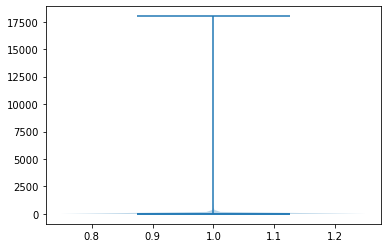

In [7]:
#Create value counts as a dataframe to index/access attributes for plotscu_city = olist_model.customer_city.value_counts().to_frame()
cu_city = olist_model.customer_city.value_counts().to_frame()
cu_city=cu_city.reset_index()
plt.violinplot(cu_city.customer_city, showmeans=True)

In [8]:
cu_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073 entries, 0 to 4072
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          4073 non-null   object
 1   customer_city  4073 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.8+ KB


In [9]:
import matplotlib as mpl

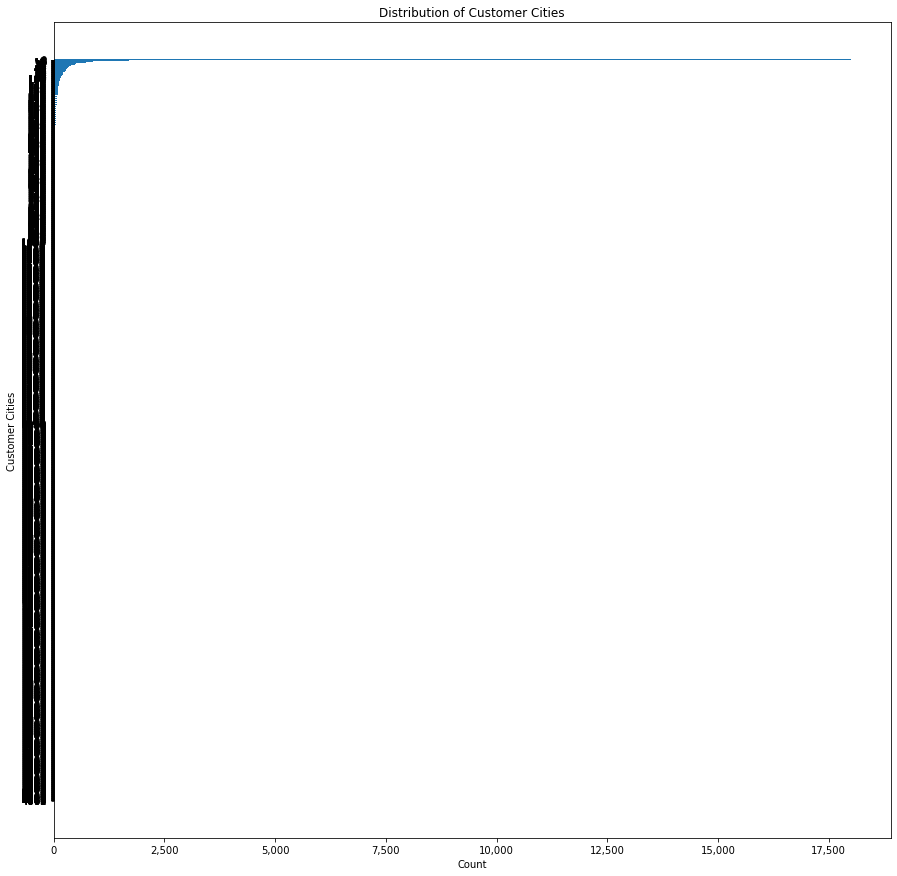

In [10]:
# Chart distribution of customer cities
fig, ax = plt.subplots(figsize=(15,15))
y = cu_city.index
y_pos = np.flip(np.arange(len(y)))
width = cu_city.customer_city
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Customer Cities')
plt.ylabel('Customer Cities')
plt.xlabel('Count')
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x29263434250>],
 'cmeans': <matplotlib.collections.LineCollection at 0x29263434a60>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x29263445580>,
 'cmins': <matplotlib.collections.LineCollection at 0x29263434cd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x29263434ac0>}

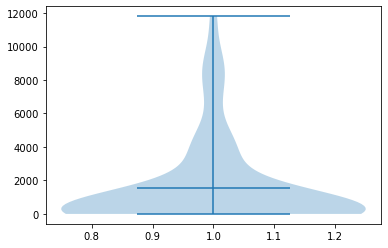

In [11]:
#violin plot of customer cities
prod_cat = olist_model.product_category_english.value_counts().to_frame()
prod_cat=prod_cat.reset_index()
plt.violinplot(prod_cat.product_category_english, showmeans=True)

In [12]:
#Check point
olist_model2 = copy.deepcopy(olist_model)

In [13]:
#replace instances that are less than 300 with 'other_city'
_ = olist_model2.customer_city.map(olist_model2.customer_city.value_counts()) < 300
olist_model2.customer_city =  olist_model2.customer_city.mask(_, 'other_city')

In [14]:
cu_city = olist_model2.customer_city.value_counts()
cu_city=cu_city.reset_index()

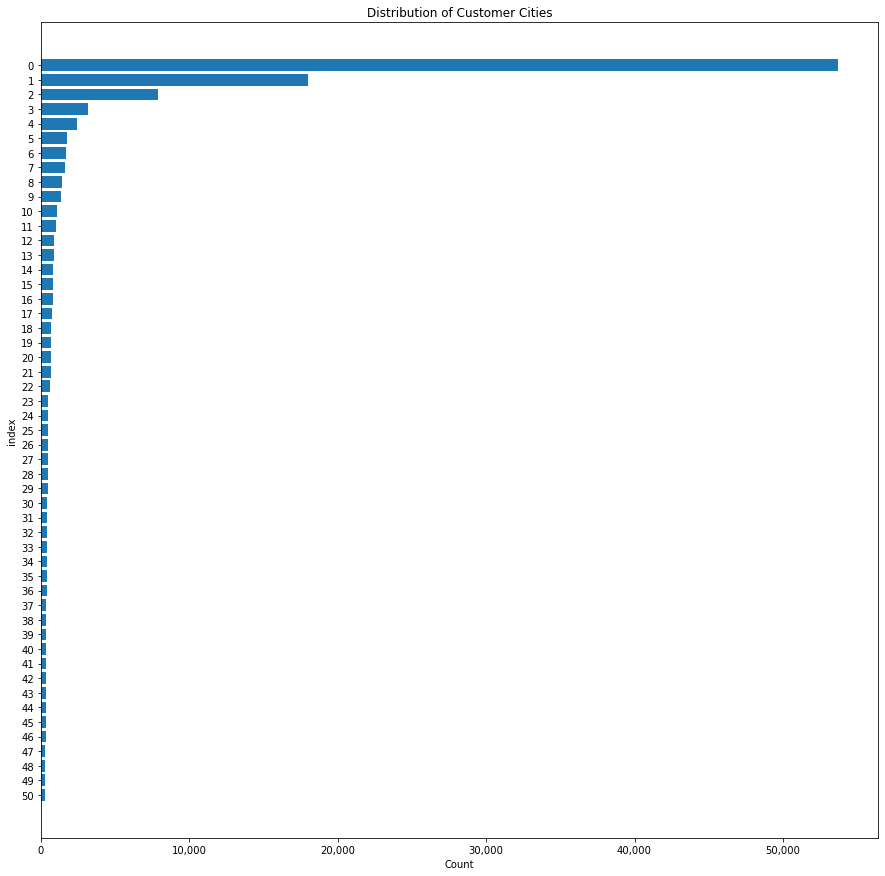

In [15]:
# Check the result
# Chart distribution of cities following the change
fig, ax = plt.subplots(figsize=(15,15))
y = cu_city.index
y_pos = np.flip(np.arange(len(y)))
width = cu_city.customer_city
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Customer Cities')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

In [16]:
#How many levels do we now have in comparison with the previous version?
olist_model.customer_city.nunique(), olist_model2.customer_city.nunique()

(4073, 51)

### Product_Category Levels <br>
The charts show many product categories with relatively few observations. Categories with less than 500 observations were converted into an 'other_category' level. 

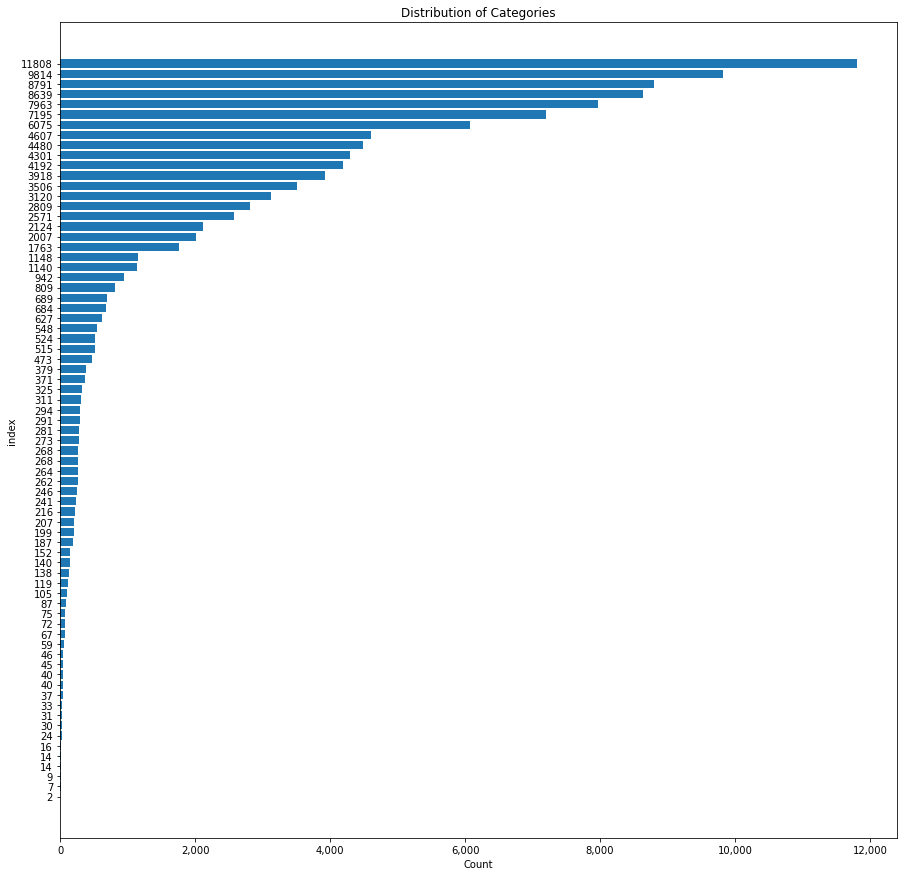

In [17]:
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = prod_cat.product_category_english
y_pos = np.flip(np.arange(len(y)))
width = prod_cat.product_category_english
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

In [18]:
#replace instances that are less than 500 with 'other_product_category'
_ = olist_model2.product_category_english.map(olist_model2.product_category_english.value_counts()) < 500
olist_model2.product_category_english =  olist_model2.product_category_english.mask(_, 'other_product_category')

In [19]:
#Create value counts as a dataframe to index/access attributes for plots
prod_cat = olist_model2.product_category_english.value_counts().to_frame()
prod_cat=prod_cat.reset_index()

In [20]:
#Check the result of the re-labeling
olist_model2.product_category_english.value_counts()

bed_bath_table                     11808
health_beauty                       9814
sports_leisure                      8791
furniture_decor                     8639
computers_accessories               7963
housewares                          7195
other_product_category              6758
watches_gifts                       6075
telephony                           4607
garden_tools                        4480
auto                                4301
toys                                4192
cool_stuff                          3918
perfumery                           3506
baby                                3120
electronics                         2809
stationery                          2571
fashion_bags_accessories            2124
pet_shop                            2007
office_furniture                    1763
luggage_accessories                 1148
consoles_games                      1140
construction_tools_construction      942
home_appliances                      809
musical_instrume

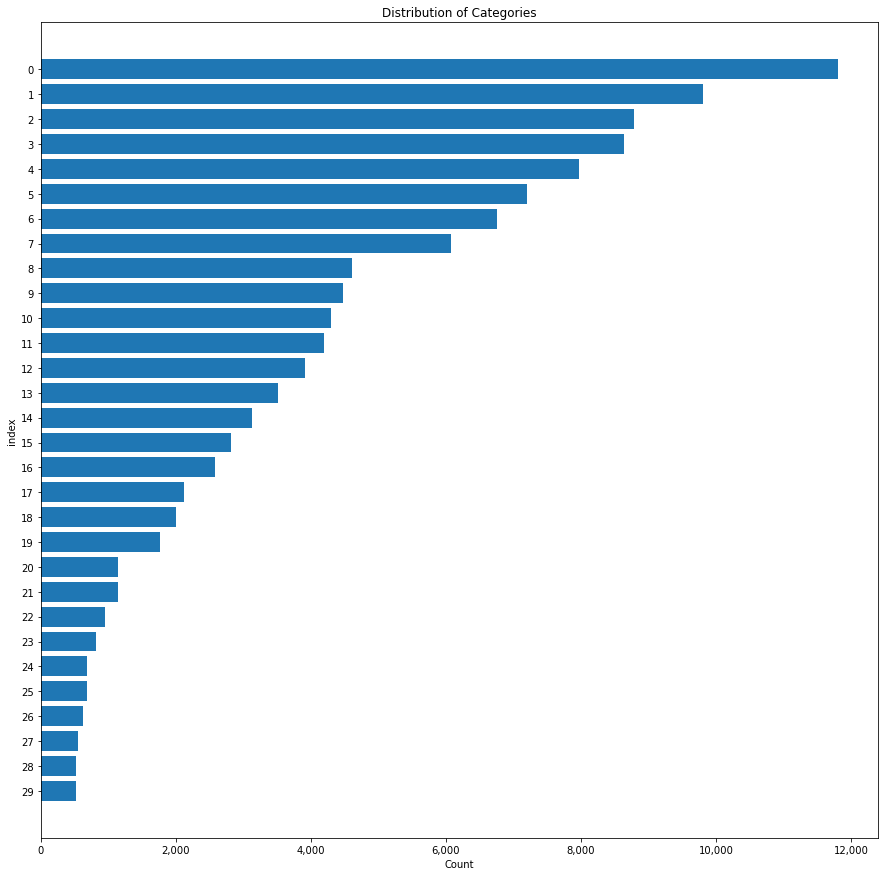

In [21]:
# Chart distribution of categories following the change
fig, ax = plt.subplots(figsize=(15,15))
y = prod_cat.index
y_pos = np.flip(np.arange(len(y)))
width = prod_cat.product_category_english
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

In [22]:
#How many levels do we now have in comparison with the previous version?
olist_model.product_category_english.nunique(), olist_model2.product_category_english.nunique()

(73, 30)

Now we see that 'rarely' occurring levels have been re-coded. This reduces our number of levels by more than 50% in product category attribute while we only have about 1% (from 4073 to 51 levels) in the customer city attribute.

## <span style='color:red'>Intuitive Feature Selection</span>
- For initial dimensionality reduction we removed nominal values (anything with the label x_id) and anything with possible NaNs such as the comments. 
- We also removed highly correlated values including:
    - weight, length and height that were all use to form the product_dimensions feature in Lab 1.
    - payment_value that is highly correlated with tot_order_amt and price.
    - delivery_estimate_discrepency since that was a variable created in Lab 1 for data analysis.
    - seller_city, seller_state, customer_city, and customer_state, since those are represented more specifically by respective zip code prefix variables. 
- Timestamp columns were removed as well, since any relationships between purchase month and weekday are represented by separate features. 

In [23]:
olist_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

In [24]:
#Subset for the modeling dataset
olist_model3 = olist_model2[['customer_zip_code_prefix', 'payment_sequential', 
                             'payment_type', 'payment_installments', 'freight_value',
                             'product_weight_g','product_category_english', 
                             'seller_zip_code_prefix', 'tot_order_amt', 
                             'purchase_wk_day', 'purchase_month', 'review_score_class',   
                             'order_delivery_actual_duration', 'product_dimensions',
                             'order_approved_at']]

In [25]:
olist_model3.head(n=15)

,customer_zip_code_prefix,payment_sequential,payment_type,payment_installments,freight_value,product_weight_g,product_category_english,seller_zip_code_prefix,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,product_dimensions,order_approved_at
0,39801,1.0,credit_card,8.0,19.53,800.0,home_construction,13321.0,99.33,Wednesday,April,bad,13,7803.0,2018-04-25 22:15:09
1,2422,1.0,credit_card,1.0,7.39,150.0,auto,4660.0,24.39,Tuesday,June,good,3,1056.0,2018-06-26 11:18:58
2,2652,1.0,credit_card,1.0,8.72,250.0,perfumery,9015.0,65.71,Tuesday,December,good,4,3360.0,2017-12-14 09:52:34
3,36060,1.0,credit_card,8.0,17.88,1200.0,bed_bath_table,13405.0,107.78,Wednesday,December,good,14,3080.0,2017-12-06 12:13:20
4,36060,1.0,credit_card,8.0,17.88,1200.0,bed_bath_table,13405.0,107.78,Wednesday,December,good,14,3080.0,2017-12-06 12:13:20
5,18570,1.0,credit_card,2.0,14.88,835.0,bed_bath_table,14940.0,128.45,Monday,May,good,11,11880.0,2018-05-21 16:14:41
6,13614,1.0,credit_card,2.0,13.71,623.0,bed_bath_table,14940.0,48.06,Monday,May,good,7,6510.0,2018-05-07 15:31:14
7,13614,1.0,credit_card,2.0,13.71,623.0,bed_bath_table,14940.0,48.06,Monday,May,good,7,6510.0,2018-05-07 15:31:14
8,31230,1.0,credit_card,1.0,21.26,7000.0,housewares,13206.0,81.16,Friday,June,good,10,32994.0,2017-06-23 13:25:19
9,15200,1.0,credit_card,3.0,11.85,425.0,perfumery,17350.0,51.84,Monday,June,good,18,2376.0,2017-06-05 10:55:16


## <span style='color:red'>Attribute Data Types</span>
When we brought in the clean merged data for Lab 1, the variable representations were lost due to converting to and from CSV file format. This block corrects those variable representations.

In [26]:
olist_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_zip_code_prefix        114067 non-null  int64  
 1   payment_sequential              114067 non-null  float64
 2   payment_type                    114067 non-null  object 
 3   payment_installments            114067 non-null  float64
 4   freight_value                   114067 non-null  float64
 5   product_weight_g                114066 non-null  float64
 6   product_category_english        114067 non-null  object 
 7   seller_zip_code_prefix          114067 non-null  float64
 8   tot_order_amt                   114067 non-null  float64
 9   purchase_wk_day                 114067 non-null  object 
 10  purchase_month                  114067 non-null  object 
 11  review_score_class              114067 non-null  object 
 12  order_delivery_a

### Review Scores as a Category <br>
In Lab 1, we took the review scores that had a range of 1-5 and converted them into 3 categories called Bad (1-2), Fair (3-4), and Good (5). For this lab, we will convert them to numerical categories to make it easier for the machine learning models to work with. 

In [27]:
#Convert review score levels into numerical dummy variables
olist_model3.review_score_class.unique()
olist_model3['review_score_class_num'] = olist_model3.review_score_class.astype("category").cat.codes.copy()

#so: 0 = Bad, 1 = fair, 2 = Good
olist_model3.head(n=15)

<ipython-input-27-d5b64e532677>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_model3['review_score_class_num'] = olist_model3.review_score_class.astype("category").cat.codes.copy()


,customer_zip_code_prefix,payment_sequential,payment_type,payment_installments,freight_value,product_weight_g,product_category_english,seller_zip_code_prefix,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,product_dimensions,order_approved_at,review_score_class_num
0,39801,1.0,credit_card,8.0,19.53,800.0,home_construction,13321.0,99.33,Wednesday,April,bad,13,7803.0,2018-04-25 22:15:09,0
1,2422,1.0,credit_card,1.0,7.39,150.0,auto,4660.0,24.39,Tuesday,June,good,3,1056.0,2018-06-26 11:18:58,2
2,2652,1.0,credit_card,1.0,8.72,250.0,perfumery,9015.0,65.71,Tuesday,December,good,4,3360.0,2017-12-14 09:52:34,2
3,36060,1.0,credit_card,8.0,17.88,1200.0,bed_bath_table,13405.0,107.78,Wednesday,December,good,14,3080.0,2017-12-06 12:13:20,2
4,36060,1.0,credit_card,8.0,17.88,1200.0,bed_bath_table,13405.0,107.78,Wednesday,December,good,14,3080.0,2017-12-06 12:13:20,2
5,18570,1.0,credit_card,2.0,14.88,835.0,bed_bath_table,14940.0,128.45,Monday,May,good,11,11880.0,2018-05-21 16:14:41,2
6,13614,1.0,credit_card,2.0,13.71,623.0,bed_bath_table,14940.0,48.06,Monday,May,good,7,6510.0,2018-05-07 15:31:14,2
7,13614,1.0,credit_card,2.0,13.71,623.0,bed_bath_table,14940.0,48.06,Monday,May,good,7,6510.0,2018-05-07 15:31:14,2
8,31230,1.0,credit_card,1.0,21.26,7000.0,housewares,13206.0,81.16,Friday,June,good,10,32994.0,2017-06-23 13:25:19,2
9,15200,1.0,credit_card,3.0,11.85,425.0,perfumery,17350.0,51.84,Monday,June,good,18,2376.0,2017-06-05 10:55:16,2


### Categorical Data Type <br>

In [28]:
cat_features = ['customer_zip_code_prefix', 'payment_type',
                'product_category_english', 'seller_zip_code_prefix',
                'purchase_wk_day', 'purchase_month', 'review_score_class',
                'order_delivery_actual_duration', 'review_score_class_num']   
                               

In [29]:
olist_model3[cat_features] = olist_model3[cat_features].astype("category")


C:\Users\Helene\anaconda3\envs\ML7331\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### DateTime Data Type
- A new attribute will be created for the hour of day that the order was approved. 
- The hour of day will be extracted from the order_approved_at timestamp

In [30]:
#Strip time of day from the date attribute.
from datetime import datetime
#first change the datatype of order_approved_at to datetime type.
olist_model3['order_approved_at']=pd.to_datetime(olist_model3['order_approved_at'])

<ipython-input-30-1dbc3191da90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_model3['order_approved_at']=pd.to_datetime(olist_model3['order_approved_at'])


**Hour Extraction**
- Round off the approved_at time datatype to nearest hour. 
    - e.g.: 9.52 = 10.00, 11:18 = 11:00
- Then extract the rounded off hour from the full timestamp
- Following successful extraction, we change the resulting object datatype to integar datatype
- Unused columns will be dropped afterwards

In [31]:
#create a new column for the hour of day of the order
olist_model3['order_approved_time2'] = olist_model3['order_approved_at'].round('H')

<ipython-input-31-c566d91969ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_model3['order_approved_time2'] = olist_model3['order_approved_at'].round('H')


In [32]:
#Extract the hour from from the newly created time
olist_model3['order_approved_hour'] = olist_model3['order_approved_time2'].dt.strftime('%H')

<ipython-input-32-3dac179a0305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_model3['order_approved_hour'] = olist_model3['order_approved_time2'].dt.strftime('%H')


In [33]:
olist_model3['order_approved_hour'] = olist_model3['order_approved_hour'].astype("int32")

<ipython-input-33-a30bc0b73e5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_model3['order_approved_hour'] = olist_model3['order_approved_hour'].astype("int32")


In [34]:
#olist_model3.info()

In [35]:
#olist_model3.head()

**Extraction**
- order_approved_time2 shows the timestamp with hour segment rounded off
- order_approved_hour shows the final result of the extraction.
- order_approved_hour now renders some columns irrelevant
    - these irrrelevant columns will be removed BUT we use a deep copy() of the dataset from here on.

In [36]:
#Checkpoint: 
olist_model4 = copy.deepcopy(olist_model3)

In [37]:
#olist_model4.info()

In [38]:
olist_model4['order_deliver_actual_duration'] = olist_model4['order_delivery_actual_duration']

#It is preferable for the attribute to be in float so show the model that it is continuous
olist_model4['order_deliver_actual_duration'] = olist_model4['order_deliver_actual_duration'].astype("float64")

In [39]:
#Remove columns that are re-coded.
olist_model4.drop(columns=['order_delivery_actual_duration', 
                           'review_score_class', 
                           'order_approved_time2',
                           'order_approved_at',
                           'order_approved_hour'
                          ], inplace =True) #it is safe to use inplace=True since this is a copy of the dataset.

In [40]:
olist_model4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       114067 non-null  category
 1   payment_sequential             114067 non-null  float64 
 2   payment_type                   114067 non-null  category
 3   payment_installments           114067 non-null  float64 
 4   freight_value                  114067 non-null  float64 
 5   product_weight_g               114066 non-null  float64 
 6   product_category_english       114067 non-null  category
 7   seller_zip_code_prefix         114067 non-null  category
 8   tot_order_amt                  114067 non-null  float64 
 9   purchase_wk_day                114067 non-null  category
 10  purchase_month                 114067 non-null  category
 11  product_dimensions             114066 non-null  float64 
 12  review_score_cla

## <span style='color:red'>Duplicates</span>
- The resulting one-to-many effect of the join operation used to merge the dataset may have caused some instances to be duplicated when certain unique id attributes are dropped from the eventual dataset.
     - The duplicates in the final version of the dataset will be removed, since a major assumption in linear regression is that observations are independant of each other and duplicates by nature are not independant.
    

In [41]:
olist_model4.duplicated().sum()
#we have 11010 duplicates in this version of the dataset.

11013

In [42]:
#First occurrence of duplicated rows are shown here
olist_model4.loc[olist_model4.duplicated(), :]

,customer_zip_code_prefix,payment_sequential,payment_type,payment_installments,freight_value,product_weight_g,product_category_english,seller_zip_code_prefix,tot_order_amt,purchase_wk_day,purchase_month,product_dimensions,review_score_class_num,order_deliver_actual_duration
4,36060,1.0,credit_card,8.0,17.88,1200.0,bed_bath_table,13405.0,107.78,Wednesday,December,3080.0,2,14.0
7,13614,1.0,credit_card,2.0,13.71,623.0,bed_bath_table,14940.0,48.06,Monday,May,6510.0,2,7.0
16,38408,1.0,credit_card,1.0,18.24,150.0,electronics,9850.0,37.89,Monday,June,4680.0,0,9.0
29,32678,1.0,credit_card,10.0,26.44,700.0,other_product_category,89070.0,86.43,Monday,August,7680.0,0,6.0
31,35162,1.0,boleto,1.0,16.11,600.0,cool_stuff,6132.0,55.11,Friday,August,48000.0,2,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113948,60873,1.0,credit_card,2.0,17.63,200.0,watches_gifts,5849.0,46.63,Monday,December,352.0,2,9.0
113962,37701,1.0,credit_card,1.0,12.93,700.0,sports_leisure,9780.0,82.92,Thursday,March,1936.0,0,7.0
113971,37810,1.0,boleto,1.0,15.10,100.0,consoles_games,17900.0,43.00,Monday,January,2304.0,2,14.0
113976,28735,1.0,credit_card,5.0,15.10,350.0,bed_bath_table,32677.0,35.07,Thursday,January,19200.0,2,4.0


In [43]:
#Removing the duplicates
olist_model5 = copy.deepcopy(olist_model4)
olist_model5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       114067 non-null  category
 1   payment_sequential             114067 non-null  float64 
 2   payment_type                   114067 non-null  category
 3   payment_installments           114067 non-null  float64 
 4   freight_value                  114067 non-null  float64 
 5   product_weight_g               114066 non-null  float64 
 6   product_category_english       114067 non-null  category
 7   seller_zip_code_prefix         114067 non-null  category
 8   tot_order_amt                  114067 non-null  float64 
 9   purchase_wk_day                114067 non-null  category
 10  purchase_month                 114067 non-null  category
 11  product_dimensions             114066 non-null  float64 
 12  review_score_cla

In [44]:
olist_model5.drop_duplicates(inplace = True) 
# setting 'inplace = True' ensures the duplicates are dropped from the dataset and not just this session

In [45]:
#Sanity check.
#Now the 11,000 duplicates have been removed.
olist_model5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103054 entries, 0 to 114066
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103054 non-null  category
 1   payment_sequential             103054 non-null  float64 
 2   payment_type                   103054 non-null  category
 3   payment_installments           103054 non-null  float64 
 4   freight_value                  103054 non-null  float64 
 5   product_weight_g               103053 non-null  float64 
 6   product_category_english       103054 non-null  category
 7   seller_zip_code_prefix         103054 non-null  category
 8   tot_order_amt                  103054 non-null  float64 
 9   purchase_wk_day                103054 non-null  category
 10  purchase_month                 103054 non-null  category
 11  product_dimensions             103053 non-null  float64 
 12  review_score_cla

In [46]:
#How much was removed = 10%
len(olist_model5)/len(olist_model4)

0.9034514802703674

# <span style='color:blue'>Data Preparation Part 2</span>
* [5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [47]:
#Might include explaination of created variables.
#Describe 3 different final datasets for each Task

- FINAL FEATURE LIST
| Feature Name | Feature Description |
| :------------ | :------------------- |
| customer_zip_code_prefix | first five digits of customer zip code |
| freight_value | item freight value (if an order has more than one item, the freight value is split between the items) |
| payment_installments | number of payment installments by customer |
| payment_sequential | number of payment methods used by the customer |
| payment_type | Payment method used by the customer [Credit card, Debit card, Boleto, Voucher] |
| product_category_english | product category name in English |
| product_dimensions | product length x width x height |
| product_weight_g | product weight measured in grams |
| purchase_month | name of month |
| purchase_wk_day | name of day |
| review_score_class | classes = [bad (1-2), fair (3-4), good (5)] |
| seller_zip_code_prefix | first five digits of seller zip code |
| tot_order_amt | price + freight_value |


# <span style='color:blue'>Modeling and Evaluation 1</span>
<span style = 'color:blue'> * [10 points] Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions. </span>

We will use the F1 score and accuracy as evaluation metrics. ***Need detailed explaination as to why these are appropriate metrics***

- Since we have an unbalanced class distribution for payment method with a strong preference for credit cards and very low preference for customers to use debit cards, we should use the F-measure to find the best balance between precision and recall vs Accuracy that puts more importance on true positives and true negatives. SOURCE:https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

# <span style='color:blue'>Modeling and Evaluation 2</span>

<span style = 'color:blue'>* [10 points] Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.</span>

**Helene's notes**
* We will be using a stratified 10-fold cross validation for our train/test split across all three tasks. ***Need why***
* Tuning parameter = K for KNN model

In [48]:
#import necessary libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.impute import SimpleImputer

## <span style='color:red'> Task 1 - Review Scores </span> 

In [49]:
review_model = copy.deepcopy(olist_model5)

In [50]:
review_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103054 entries, 0 to 114066
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103054 non-null  category
 1   payment_sequential             103054 non-null  float64 
 2   payment_type                   103054 non-null  category
 3   payment_installments           103054 non-null  float64 
 4   freight_value                  103054 non-null  float64 
 5   product_weight_g               103053 non-null  float64 
 6   product_category_english       103054 non-null  category
 7   seller_zip_code_prefix         103054 non-null  category
 8   tot_order_amt                  103054 non-null  float64 
 9   purchase_wk_day                103054 non-null  category
 10  purchase_month                 103054 non-null  category
 11  product_dimensions             103053 non-null  float64 
 12  review_score_cla

In [51]:
#Move the target response to the last column
review_model["review_scor_class_num"] = review_model["review_score_class_num"]
review_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103054 entries, 0 to 114066
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103054 non-null  category
 1   payment_sequential             103054 non-null  float64 
 2   payment_type                   103054 non-null  category
 3   payment_installments           103054 non-null  float64 
 4   freight_value                  103054 non-null  float64 
 5   product_weight_g               103053 non-null  float64 
 6   product_category_english       103054 non-null  category
 7   seller_zip_code_prefix         103054 non-null  category
 8   tot_order_amt                  103054 non-null  float64 
 9   purchase_wk_day                103054 non-null  category
 10  purchase_month                 103054 non-null  category
 11  product_dimensions             103053 non-null  float64 
 12  review_score_cla

In [52]:
#Remove columns that are recoded.
review_model.drop(columns=['review_score_class_num'], inplace =True)
review_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103054 entries, 0 to 114066
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103054 non-null  category
 1   payment_sequential             103054 non-null  float64 
 2   payment_type                   103054 non-null  category
 3   payment_installments           103054 non-null  float64 
 4   freight_value                  103054 non-null  float64 
 5   product_weight_g               103053 non-null  float64 
 6   product_category_english       103054 non-null  category
 7   seller_zip_code_prefix         103054 non-null  category
 8   tot_order_amt                  103054 non-null  float64 
 9   purchase_wk_day                103054 non-null  category
 10  purchase_month                 103054 non-null  category
 11  product_dimensions             103053 non-null  float64 
 12  order_deliver_ac

In [53]:
#train test split
#set the random state. Stratify based on review_score _class. see explanation above 

from sklearn.model_selection import train_test_split
review_train, review_test = train_test_split(review_model, test_size=0.3,random_state=100, 
                                           stratify = review_model.review_scor_class_num)

In [54]:
#Proportions of class in the review_score_class attribute in the TRAIN SET
review_train['review_scor_class_num'].value_counts()/len(review_train)

2    0.775926
0    0.139873
1    0.084201
Name: review_scor_class_num, dtype: float64

In [55]:
#Proportions of class in the review_score_class attribute in the main dataset
review_model['review_scor_class_num'].value_counts()/len(review_model)

2    0.775923
0    0.139878
1    0.084199
Name: review_scor_class_num, dtype: float64

In [56]:
#Proportions of class in the review_score_class attribute in the TEST SET
review_test['review_scor_class_num'].value_counts()/len(review_test)

2    0.775916
0    0.139891
1    0.084193
Name: review_scor_class_num, dtype: float64

### Drop target variable (review_score_class_num)

In [57]:
# Separate the target variable from the training dataset
review_train_y = review_train.review_scor_class_num
len(review_train_y)

72137

In [58]:
#drop target variable from training set
review_train_noY = review_train.copy().drop(columns=['review_scor_class_num'])
review_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72137 entries, 43300 to 9156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       72137 non-null  category
 1   payment_sequential             72137 non-null  float64 
 2   payment_type                   72137 non-null  category
 3   payment_installments           72137 non-null  float64 
 4   freight_value                  72137 non-null  float64 
 5   product_weight_g               72137 non-null  float64 
 6   product_category_english       72137 non-null  category
 7   seller_zip_code_prefix         72137 non-null  category
 8   tot_order_amt                  72137 non-null  float64 
 9   purchase_wk_day                72137 non-null  category
 10  purchase_month                 72137 non-null  category
 11  product_dimensions             72137 non-null  float64 
 12  order_deliver_actual_duration

In [59]:
# Separate the target variable from the test dataset
review_test_y = review_test.review_scor_class_num
len(review_test_y)

30917

In [60]:
#drop target variable from test set
review_test_noY = review_test.copy().drop('review_scor_class_num', axis=1)
review_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30917 entries, 57253 to 60723
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       30917 non-null  category
 1   payment_sequential             30917 non-null  float64 
 2   payment_type                   30917 non-null  category
 3   payment_installments           30917 non-null  float64 
 4   freight_value                  30917 non-null  float64 
 5   product_weight_g               30916 non-null  float64 
 6   product_category_english       30917 non-null  category
 7   seller_zip_code_prefix         30917 non-null  category
 8   tot_order_amt                  30917 non-null  float64 
 9   purchase_wk_day                30917 non-null  category
 10  purchase_month                 30917 non-null  category
 11  product_dimensions             30916 non-null  float64 
 12  order_deliver_actual_duratio

**Preprocessing**
- This will follow the same process as before. 
- The cited references for the previous section equaly applies here.
- Pipeline using StandardScaler


In [61]:
#Standard default scaler for numeric variables.
numeric_pipeline = make_pipeline(StandardScaler()) 

In [62]:
oh_pipeline1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [63]:
import category_encoders as ce
hc_pipeline = make_pipeline(ce.GLMMEncoder())

In [64]:
#my custom function to select numerical attributes
def my_num_columns(df):
    num_attribute = [i for i in df.columns if (df.loc[:,i].dtypes in ['int32', 'float64'])]
    
    return num_attribute

#test my function
review_num_features = my_num_columns(review_train_noY)


print(len(review_num_features)), print(review_num_features)

7
['payment_sequential', 'payment_installments', 'freight_value', 'product_weight_g', 'tot_order_amt', 'product_dimensions', 'order_deliver_actual_duration']


(None, None)

In [65]:
#my custom function to select low cardinality attributes
def my_lc_columns(df):
    lc_attributes = [i for i in df.columns if df.loc[:,i].nunique()< 10 and (df.loc[:,i].dtypes not in ['int32', 'float64'])]
    
    return lc_attributes


#test my function
review_lc_features = my_lc_columns(review_train_noY)


print(len(review_lc_features)), print(review_lc_features)
    

2
['payment_type', 'purchase_wk_day']


(None, None)

In [66]:
def my_hc_columns(df):
    hc_attribute = [i for i in df.columns if df.loc[:,i].nunique()> 10 and (df.loc[:,i].dtypes not in ['int32', 'float64'])]
    
    return hc_attribute

review_hc_features = my_hc_columns(review_train_noY)


print(len(review_hc_features)), print(review_hc_features)

4
['customer_zip_code_prefix', 'product_category_english', 'seller_zip_code_prefix', 'purchase_month']


(None, None)

In [67]:
fullpipeline_rs = ColumnTransformer(transformers=\
                                       [('numeric_pipeline', numeric_pipeline, my_num_columns),\
                                        ('oh_pipeline', oh_pipeline1, my_lc_columns),\
                                         ('hc_pipeline', hc_pipeline, my_hc_columns)],                                       
                                       remainder='drop')

In [68]:
#Make Y classification
review_X_train_rs = fullpipeline_rs.fit_transform(review_train_noY, review_train_y)
review_X_test_rs = fullpipeline_rs.transform(review_test_noY)

C:\Users\Helene\anaconda3\envs\ML7331\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [69]:
print(review_X_train_rs.shape)
print(review_X_test_rs.shape)

(72137, 22)
(30917, 22)


**Handling NaN**
-The same NaNs are also recorded here so we use the same imputation method we used before.
%CHECK THIS


In [70]:
#Where the Nans occurred
#np.argwhere(np.isnan(review_X_train_rs))

In [71]:
#Simple Imputer for the NaNs in ColumnTransform dataset
#imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
#imputer=imputer.fit(review_X_train_rs)
#review_X_train_rs1=imputer.transform(review_X_train_rs)

## <span style='color:red'> Task 2 - Delivery Date </span>

#### Train_test split
**stratified, shuffle**
- Using the crossvalidation combined with for-loop as taught in class generated error that relate index
- Alternatively, 
    - we found the stratified and shuffle as 'settable' parameters in the sci-kit learn's generic train_test_split() method.
    - My only concern is that since we are not explicitly assigning the instances based on unique id (e.g. index), may be the shuffling might wrongly assign an instance to train as well as test at each shuffle event. The documentation did not show this concern.
- Random state is set to prevent data leakage and to ensure reproducibility
- Even though we generally worry about class-imbalance in a target attribute, such is not applicable in this regression task where the target variable is a continuous datatype
    -*however*, the correlation heatmap implies that review score attribute has the highest correlation coefficient with delivery attributes.
    - To mine the review_score attribute efficiently we ensure that the class proportions with respect to review_class are maintained across all splits. viz: main dataset, train set, test set.
- The train_test split uses shuffle by default.
    - We must avoid data leakage/snooping so we set random seed so that we don't get to 'see' the test set in subsequent runs of split.


In [72]:
delivery_model = copy.deepcopy(olist_model5)

In [73]:
#train test split
#set the random state. Stratify based on review_score _class. see explanation above 

from sklearn.model_selection import train_test_split
delivery_train, delivery_test = train_test_split(delivery_model, test_size=0.3,random_state=100, 
                                           stratify = delivery_model.review_score_class_num)

In [74]:
#Proportions of class in the review_score_class attribute in the TRAIN SET
delivery_train['review_score_class_num'].value_counts()/len(delivery_train)

2    0.775926
0    0.139873
1    0.084201
Name: review_score_class_num, dtype: float64

In [75]:
#Proportions of class in the review_score_class attribute in the TRAIN SET
delivery_test['review_score_class_num'].value_counts()/len(delivery_test)

2    0.775916
0    0.139891
1    0.084193
Name: review_score_class_num, dtype: float64

In [76]:
#Proportions of class in the review_score_class attribute in the main dataset
delivery_model['review_score_class_num'].value_counts()/len(delivery_model)

2    0.775923
0    0.139878
1    0.084199
Name: review_score_class_num, dtype: float64

**Stratified**:
- we can see that the 77%, 14% and 8% proportions are maintained across all the split sets.

In [77]:
delivery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72137 entries, 43300 to 9156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       72137 non-null  category
 1   payment_sequential             72137 non-null  float64 
 2   payment_type                   72137 non-null  category
 3   payment_installments           72137 non-null  float64 
 4   freight_value                  72137 non-null  float64 
 5   product_weight_g               72137 non-null  float64 
 6   product_category_english       72137 non-null  category
 7   seller_zip_code_prefix         72137 non-null  category
 8   tot_order_amt                  72137 non-null  float64 
 9   purchase_wk_day                72137 non-null  category
 10  purchase_month                 72137 non-null  category
 11  product_dimensions             72137 non-null  float64 
 12  review_score_class_num       

In [78]:
delivery_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30917 entries, 57253 to 60723
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       30917 non-null  category
 1   payment_sequential             30917 non-null  float64 
 2   payment_type                   30917 non-null  category
 3   payment_installments           30917 non-null  float64 
 4   freight_value                  30917 non-null  float64 
 5   product_weight_g               30916 non-null  float64 
 6   product_category_english       30917 non-null  category
 7   seller_zip_code_prefix         30917 non-null  category
 8   tot_order_amt                  30917 non-null  float64 
 9   purchase_wk_day                30917 non-null  category
 10  purchase_month                 30917 non-null  category
 11  product_dimensions             30916 non-null  float64 
 12  review_score_class_num      

### Drop target variable (order_deliver_actual_duration)

In [79]:
# Separate the target variable from the training dataset
delivery_train_y = delivery_train.order_deliver_actual_duration
len(delivery_train_y)

72137

In [80]:
#drop target variable from training set
delivery_train_noY = delivery_train.copy().drop('order_deliver_actual_duration', axis=1)
delivery_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72137 entries, 43300 to 9156
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_zip_code_prefix  72137 non-null  category
 1   payment_sequential        72137 non-null  float64 
 2   payment_type              72137 non-null  category
 3   payment_installments      72137 non-null  float64 
 4   freight_value             72137 non-null  float64 
 5   product_weight_g          72137 non-null  float64 
 6   product_category_english  72137 non-null  category
 7   seller_zip_code_prefix    72137 non-null  category
 8   tot_order_amt             72137 non-null  float64 
 9   purchase_wk_day           72137 non-null  category
 10  purchase_month            72137 non-null  category
 11  product_dimensions        72137 non-null  float64 
 12  review_score_class_num    72137 non-null  category
dtypes: category(7), float64(6)
memory usage: 5.

In [81]:
# Separate the target variable from the training dataset
delivery_test_y = delivery_test.order_deliver_actual_duration
len(delivery_test_y)

30917

In [82]:
#All predictor attributes test
delivery_test_noY = delivery_test.copy().drop('order_deliver_actual_duration', axis=1)
delivery_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30917 entries, 57253 to 60723
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_zip_code_prefix  30917 non-null  category
 1   payment_sequential        30917 non-null  float64 
 2   payment_type              30917 non-null  category
 3   payment_installments      30917 non-null  float64 
 4   freight_value             30917 non-null  float64 
 5   product_weight_g          30916 non-null  float64 
 6   product_category_english  30917 non-null  category
 7   seller_zip_code_prefix    30917 non-null  category
 8   tot_order_amt             30917 non-null  float64 
 9   purchase_wk_day           30917 non-null  category
 10  purchase_month            30917 non-null  category
 11  product_dimensions        30916 non-null  float64 
 12  review_score_class_num    30917 non-null  category
dtypes: category(7), float64(6)
memory usage: 2

In [83]:
#Target variable
delivery_test_y = delivery_test.order_deliver_actual_duration
len(delivery_test_y)

30917

### Column Transformer

In [84]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.impute import SimpleImputer


#### MY OWN WORDS OF INTERPRETATION
I believe the column mismatch error could be due to the encoding that generated different number of columns for train and test sets.
I used the approach of Kyle Gilde (https://www.kaggle.com/kylegilde/building-columntransformers-dynamically) and it solved this problem.

- This approach separated high cardinal attributes (attributes with more than 10 levels) from low cardinal one (attributes with fewer than 10 levels) .
    - High cardinal attributes are those with significant number of levels (for instance, Product_category in the dataset with 73 levels.)
    - The popular OneHotEncoding() (OHE) was used to transform the two low cardinal attributes.
    - The Generalized Linear Mixed Model Encoder (GLMME) was used to transform the high cardinal attributes.
        - The GLMME also encodes each level of the categorical varible much like OHE but rather than return a 0,1 dummy varibles, its sci-kit learn documentation (http://contrib.scikit-learn.org/category_encoders/_modules/category_encoders/glmm.html) states  that there are no hyper-parameter to tune which makes it simple to use for me. It also states that it is supported by a well grounded statistical theory. This is because GLMME is an extension of such generalized linear models like the logistic regression (source: Institute for Digital Research and Education, UCLA. https://stats.idre.ucla.edu/other/mult-pkg/introduction-to-generalized-linear-mixed-models/)   



In [85]:
#my custom function to select numerical attributes
def my_num_columns(df):
    num_attribute = [i for i in df.columns if (df.loc[:,i].dtypes in ['int32', 'float64'])]
    
    return num_attribute

#test my function
delivery_num_features = my_num_columns(delivery_train_noY)


print(len(delivery_num_features)), print(delivery_num_features)

6
['payment_sequential', 'payment_installments', 'freight_value', 'product_weight_g', 'tot_order_amt', 'product_dimensions']


(None, None)

In [86]:
#my custom function to select low cardinality attributes
def my_lc_columns(df):
    lc_attributes = [i for i in df.columns if df.loc[:,i].nunique()< 10 and (df.loc[:,i].dtypes not in ['int32', 'float64'])]
    
    return lc_attributes


#test my function
delivery_lc_features = my_lc_columns(delivery_train_noY)


print(len(delivery_lc_features)), print(delivery_lc_features)
    

3
['payment_type', 'purchase_wk_day', 'review_score_class_num']


(None, None)

In [87]:
oh_pipeline1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [88]:
def my_hc_columns(df):
    hc_attribute = [i for i in df.columns if df.loc[:,i].nunique()> 10 and (df.loc[:,i].dtypes not in ['int32', 'float64'])]
    
    return hc_attribute

delivery_hc_features = my_hc_columns(delivery_train_noY)


print(len(delivery_hc_features)), print(delivery_hc_features)

4
['customer_zip_code_prefix', 'product_category_english', 'seller_zip_code_prefix', 'purchase_month']


(None, None)

In [89]:
#Standard default scaler for numeric variables.
numeric_pipeline = make_pipeline(StandardScaler()) 

**ColumnTransformer**
-Transformation functions such as standardscaler() should be applied to train and test SEPARATELY,  
    - that is why I utilized the custom function to select features.  
    -So the ColumnTransformer pipeline is now a 'generic' pipeline that works INDEPENDENTLY on train and test.

In [90]:
import category_encoders as ce
hc_pipeline = make_pipeline(ce.GLMMEncoder())

In [91]:
fullpipeline_simple = ColumnTransformer(transformers=\
                                       [('numeric_pipeline', numeric_pipeline, my_num_columns),\
                                        ('oh_pipeline', oh_pipeline1, my_lc_columns),\
                                         ('hc_pipeline', hc_pipeline, my_hc_columns)],                                       
                                       remainder='drop')

In [92]:
#Make Y classification
delivery_X_train_class = fullpipeline_simple.fit_transform(delivery_train_noY, delivery_train_y)
delivery_X_test_class = fullpipeline_simple.transform(delivery_test_noY)

C:\Users\Helene\anaconda3\envs\ML7331\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [93]:
type(delivery_X_train_class)

numpy.ndarray

In [94]:
#sanity check
delivery_X_train_class

array([[-0.13462592, -0.69692867,  0.62155425, ...,  0.62159188,
         2.50774939, -2.3271823 ],
       [-0.13462592,  0.03785076, -0.14959288, ...,  0.62159188,
        -1.16997215,  2.65728524],
       [-0.13462592, -0.69692867, -0.46117379, ...,  0.39040966,
         1.93750678, -1.26615646],
       ...,
       [-0.13462592, -0.69692867,  1.33213354, ..., -0.34120503,
         0.22617558, -1.26615646],
       [-0.13462592, -0.32953896, -0.26947973, ..., -0.34660232,
        -1.35085588, -2.84227251],
       [-0.13462592, -0.69692867, -0.16520315, ..., -0.34660232,
         1.23216246,  2.65728524]])

**Pre-processed**  
- The number of columns have now increased from 13 to 16,954 and are now represented in a sparse dataset.
- This a very large dataset that has to be managed carefully.

In [95]:
print(delivery_X_train_class.shape)
print(delivery_X_test_class.shape)

(72137, 24)
(30917, 24)


### NaN in transformed data - %DOUBLE CHECK THIS SECTION

- I ran my model on the pre-processed set that resulted from ColumnTransformation.
    - There was an error about NaN, infinity input values, so I figured there were NaNs in the processed dataset.
    - I used imputation to fix NaNs.

In [96]:
#Where the Nans occurred
#np.argwhere(np.isnan(delivery_X_train_class))

In [97]:
#Finding the NaN values
#delivery_X_train_diff = pd.DataFrame(delivery_X_train_class)

In [98]:
#Checking out the NaNs
#delivery_X_train_diff.iloc[76265:76272,3:6]

**Investigating source of NaN**
- Let us take a look at the original dataset to see if there is any issues with raw data
- There is nothing unusual in the  raw data of those transformation that resulted in NaN
- This requires further exploration that will focus on the *ce* package source algorithm for glmmEncoder.
    - But for now we can impute the two NaN values with mean of their respective columns.

In [99]:
#delivery_train_noY.iloc[76265:76272,3:6]

In [100]:
#Simple Imputer for the NaNs in ColumnTransform dataset
#imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
#imputer=imputer.fit(delivery_X_train_class)
#delivery_X_train_class1=imputer.transform(delivery_X_train_class)

## <span style='color:red'> Task 3 - Payment Method </span>



In [101]:
payment_model = copy.deepcopy(olist_model5)

In [102]:
# remove the response variable - payment_method
payment_y = copy.deepcopy(payment_model.payment_type)
payment_X = copy.deepcopy(payment_model.drop(columns=['payment_type']))
print(payment_y.value_counts())

print('\n=====================\nolist_X\n=====================\n')
payment_X.info()

credit_card    76346
boleto         19562
voucher         5630
debit_card      1516
Name: payment_type, dtype: int64

olist_X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103054 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103054 non-null  category
 1   payment_sequential             103054 non-null  float64 
 2   payment_installments           103054 non-null  float64 
 3   freight_value                  103054 non-null  float64 
 4   product_weight_g               103053 non-null  float64 
 5   product_category_english       103054 non-null  category
 6   seller_zip_code_prefix         103054 non-null  category
 7   tot_order_amt                  103054 non-null  float64 
 8   purchase_wk_day                103054 non-null  category
 9   purchase_month                 103054 non-null  category
 10  product_dimen

#### plot the distribution of y

f, ax = plt.subplots(figsize=(10,5), tight_layout=True)

labels, counts = np.unique(payment_y, return_counts=True)
ax.bar(labels, counts, align='center', color='blue')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to the yaxis ticks
ax.set_facecolor('white')

plt.title('Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Numer of Uses By Payment Method')

plt.show()

# note the uneven distribution of payment types, with a strong preference to use credit cards 
# - we will need to weight our model results

In [103]:
# before we get started, we need to remove fields with NaN - as in the comment title and message fields
X = copy.deepcopy(payment_X)
y = copy.deepcopy(payment_y)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103054 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103054 non-null  category
 1   payment_sequential             103054 non-null  float64 
 2   payment_installments           103054 non-null  float64 
 3   freight_value                  103054 non-null  float64 
 4   product_weight_g               103053 non-null  float64 
 5   product_category_english       103054 non-null  category
 6   seller_zip_code_prefix         103054 non-null  category
 7   tot_order_amt                  103054 non-null  float64 
 8   purchase_wk_day                103054 non-null  category
 9   purchase_month                 103054 non-null  category
 10  product_dimensions             103053 non-null  float64 
 11  review_score_class_num         103054 non-null  category
 12  order_deliver_ac

In [104]:
bad_seed = X[X.product_weight_g.isna()].index.values.tolist()[0]
print('Row Index:',bad_seed, 'has NaN\'s')
X = X.drop(index = [bad_seed], axis = 0)
y = y.drop(index = [bad_seed], axis = 0)

X.isna().any()

Row Index: 40711 has NaN's


customer_zip_code_prefix         False
payment_sequential               False
payment_installments             False
freight_value                    False
product_weight_g                 False
product_category_english         False
seller_zip_code_prefix           False
tot_order_amt                    False
purchase_wk_day                  False
purchase_month                   False
product_dimensions               False
review_score_class_num           False
order_deliver_actual_duration    False
dtype: bool

##### StratifiedShuffleSplit Train/Test
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html?highlight=stratifiedshufflesplit#sklearn.model_selection.StratifiedShuffleSplit

In [105]:
# train/ test split
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=10,test_size = 0.3, 
                            train_size = 0.7, random_state=100) #note default is 10 splits!

print(cv)
print(cv.get_n_splits(X,y))

# fill in the training and testing data and save as separate variables
for trainidx, testidx in cv.split(X,y):
    # using a dataframe we need to reference the rows using pd.iloc[] notation
    # if we were using a numpy array or sparse matrix, we would be able to just use X[<index>]
    payment_X_train, payment_X_test = X.iloc[trainidx], X.iloc[testidx] 
    payment_y_train, payment_y_test = y.iloc[trainidx], y.iloc[testidx]


StratifiedShuffleSplit(n_splits=10, random_state=100, test_size=0.3,
            train_size=0.7)
10


In [106]:
print('Let\'s take a look at how our training/ test splits came out:')
print(cv,'\nn_splits:',cv.get_n_splits(X,y))
print('payment_X_train.shape:',payment_X_train.shape, 'payment_X_test.shape:',payment_X_test.shape)
print('payment_y_train.shape:',payment_y_train.shape, 'payment_y_test.shape:',payment_y_test.shape)

Let's take a look at how our training/ test splits came out:
StratifiedShuffleSplit(n_splits=10, random_state=100, test_size=0.3,
            train_size=0.7) 
n_splits: 10
payment_X_train.shape: (72137, 13) payment_X_test.shape: (30916, 13)
payment_y_train.shape: (72137,) payment_y_test.shape: (30916,)


In [107]:
payment_X_train.describe(include=['category'], exclude='datetime')

,customer_zip_code_prefix,product_category_english,seller_zip_code_prefix,purchase_wk_day,purchase_month,review_score_class_num
count,72137,72137,72137.0,72137,72137,72137
unique,13702,30,2026.0,7,12,3
top,22790,bed_bath_table,14940.0,Monday,August,2
freq,97,7411,5172.0,11693,7857,55976


In [108]:
payment_X_test.describe(include=['category'], exclude='datetime')

,customer_zip_code_prefix,product_category_english,seller_zip_code_prefix,purchase_wk_day,purchase_month,review_score_class_num
count,30916,30916,30916.0,30916,30916,30916
unique,10515,30,1740.0,7,12,3
top,24230,bed_bath_table,14940.0,Monday,August,2
freq,46,3220,2250.0,5063,3420,23985


In [109]:
# use SelectKBest from Sklearn to get an idea of best features
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

# scale numerical variables in place
scaler = StandardScaler(copy=False) #this way we can just replace the raw data with the scaled data
scaler.fit_transform(payment_X_train.select_dtypes('float64','int64'))
scaler.fit_transform(payment_X_test.select_dtypes('float64','int64'))


# convert categorical variables into numeric values
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=-1) 

enc.fit(payment_X_train) # 
payment_X_train_num = enc.transform(payment_X_train)
payment_X_test_num = enc.transform(payment_X_test)

    
# convert the resonse variables into numeric values using LabelEncoder 
le = LabelEncoder()
le.fit(payment_y_train)
payment_y_train_num = le.transform(payment_y_train)
payment_y_test_num = le.transform(payment_y_test)
    
# build the feature selection function using SelectKBest
# Note here: i ran this and determined that I wanted k=16 total
# after running this the first time, I decided that I wanted to keep the top 11 features to make sure and include
# payment_sequential since that just feel intuitively important when determining how a customer will pay
skb = SelectKBest(chi2, k=10)  
skb.fit(payment_X_train_num,payment_y_train_num)
payment_X_train_feats = skb.transform(payment_X_train_num)
payment_X_test_feats = skb.transform(payment_X_test_num)


# create a dataframe matching feature names to chi^2 scores
cols = np.array(X.columns)
pd.options.display.float_format = '{:.2f}'.format # remove that pesky scientific notation
payment_feat_scores = pd.DataFrame({'feature':cols, 'score':skb.scores_, 'p_values': skb.pvalues_})

# sort by score values in descending order
payment_feat_scores.sort_values(by = ['score'], axis=0, ascending=False, inplace=True, ignore_index=True)

# print out feature chi^2 scores
print(payment_feat_scores)

                          feature      score  p_values
0                   tot_order_amt 2005623.18      0.00
1        customer_zip_code_prefix  237782.53      0.00
2              payment_sequential  103883.58      0.00
3              product_dimensions   65116.35      0.00
4                product_weight_g   37536.23      0.00
5            payment_installments   31200.37      0.00
6                   freight_value   28286.67      0.00
7          seller_zip_code_prefix    6890.33      0.00
8   order_deliver_actual_duration     180.26      0.00
9        product_category_english     179.89      0.00
10                 purchase_month      95.17      0.00
11                purchase_wk_day      21.77      0.00
12         review_score_class_num       3.37      0.34


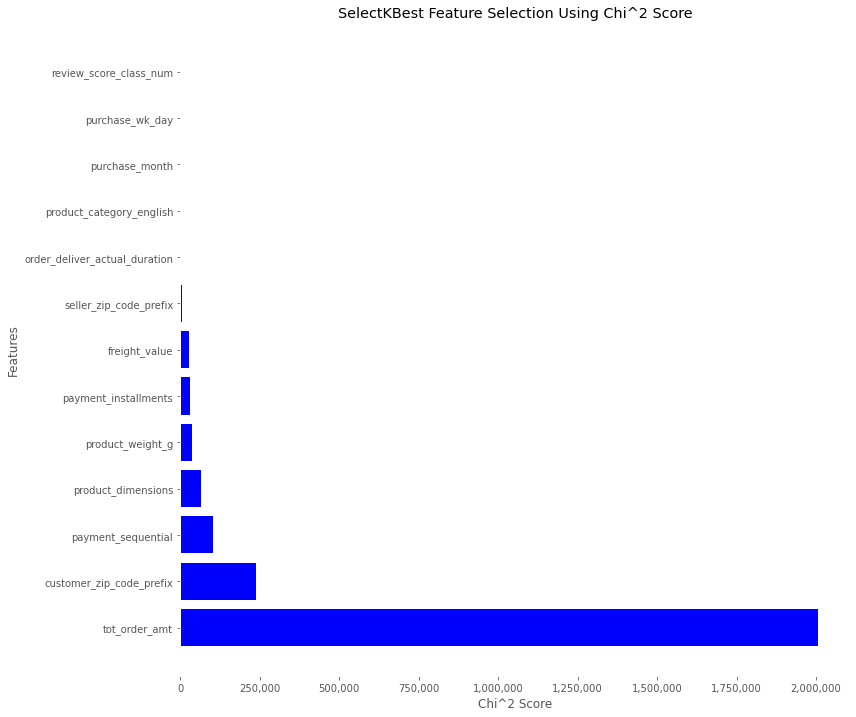

In [110]:
# let's also plot the scores to get a visual sense of what features are deemed most important
from matplotlib import pyplot

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,12))

ft = payment_feat_scores.feature
width = payment_feat_scores.score

ax.barh(ft, width=width, align='center', color='blue')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # add commas in the x axis numbers
ax.set_facecolor('white')
ax.set_yticks(ft)
ax.set_yticklabels(ft)

plt.title('SelectKBest Feature Selection Using Chi^2 Score')
plt.ylabel('Features')
plt.xlabel('Chi^2 Score')
plt.show()



#Note I want to keep the top 10, so we will rerun this using k=15 to get our X_train_feats/ X_test_feats with 10 features

In [111]:
print(X.shape, y.shape)

(103053, 13) (103053,)


# <span style='color:blue'>Modeling and Evaluation 3</span>
<span style='color:blue'>* [20 points] Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!</span>

## <span style='color:red'> Task 1 - Review Scores </span> 
- Predict review score
- Then generate feature importance from the best model/predictor to understand the features that best influence review score.

MODELS:
1. SGD Classifier
2. Random Forest Classifier
3. Gaussian Naive Bayes

In [112]:
from sklearn.metrics import mean_squared_error

In [113]:
#test preprocessed on linear regression and see what happens
lin_reg = LinearRegression()

In [114]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=100)

In [115]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=1000, max_leaf_nodes=10, n_jobs=-1, random_state=100)

In [116]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=100)

In [117]:
myclf = [lin_reg,sgd_reg, rnd_reg, xgb_reg]

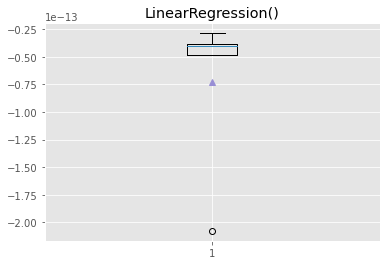

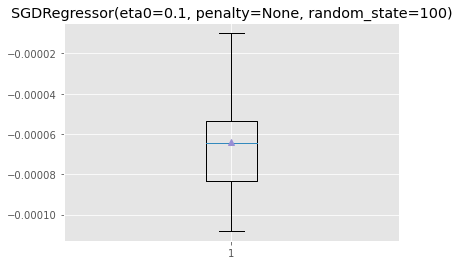

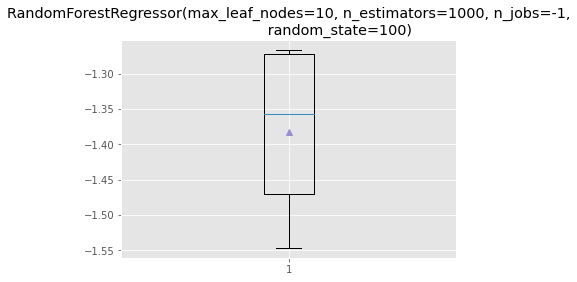

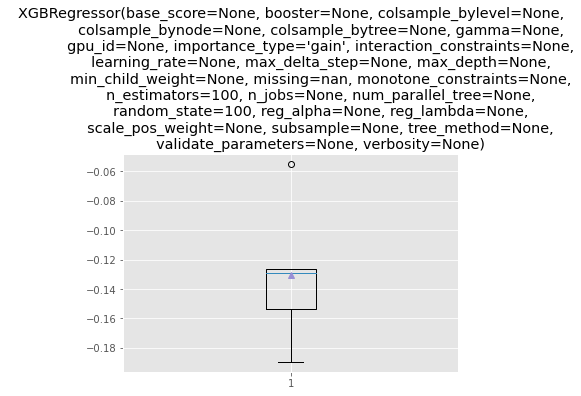

In [118]:
list_scores = []
for clf in myclf:
    scores = cross_val_score(clf, review_X_train_rs, delivery_train_y,scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    list_scores.append(scores)    
    pyplot.boxplot(scores, showmeans=True)
    pyplot.title(clf)
    pyplot.show()    

In [119]:
#Sanity check to view the list of rmse scores
list_scores

[array([-3.82193508e-14, -2.86925498e-14, -4.87853846e-14, -3.98365213e-14,
        -2.07649584e-13]),
 array([-5.36469428e-05, -6.45403815e-05, -8.31024964e-05, -9.97810992e-06,
        -1.08127706e-04]),
 array([-1.27215761, -1.35652628, -1.46997295, -1.54640126, -1.26701856]),
 array([-0.12643471, -0.05509834, -0.1532766 , -0.18957722, -0.12934772])]

In [120]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
review_rnd_clf = rnd_clf.fit(review_X_train_rs, review_train_y)
review_y_test_pred_rf = review_rnd_clf.predict(review_X_test_rs)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(review_test_y, review_y_test_pred_rf)

NameError: name 'review_y_test_pred_rf' is not defined

In [122]:
from sklearn.metrics import classification_report
print(classification_report(review_test_y, review_y_test_pred_rf))

NameError: name 'review_y_test_pred_rf' is not defined

In [123]:
#Logistic regression
logr_clf = LogisticRegression(penalty='l2', #default
                              C=1, #default 
                              class_weight='balanced', # use with imbalanced dataset
                              solver='newton-cg', # only solver that works with this dataset
                              multi_class='multinomial', 
                              random_state=100) 

In [124]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [125]:
myclf = [logr_clf,sgd_clf, rnd_clf]

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial', random_state=100)
clf2 = RandomForestClassifier(n_estimators=500, random_state=100)
clf3 = GaussianNB()



- Based on previous classification, I believe Logistic regression has been doing very good in this project so I give its weight a 2.  
**Ensemble Voting methods**

Each base classifier is always trying to 'correct' it s predecessor.
- Therefore, a set of 'average predictors yields higher performance metrics.

**Gaussian Naive Bayes**
- After the transformation using GLMME and standardscaler, it looks like Gaussian Naive Bayes will work with the dataset.
- complementNB() and MultinomialNB() yielded error about negative values in training set.
- These negative values resulted from the GLMMEncoding transformation.



In [127]:
eclf = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft', weights=[1,1,1])
eclf = eclf.fit(review_X_train_rs, review_train_y)
review_y_test_pred_vote= eclf.predict(review_X_train_rs)

C:\Users\Helene\anaconda3\envs\ML7331\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
from sklearn.metrics import classification_report
print(classification_report(review_test_y, review_y_test_pred_vote))

ValueError: Found input variables with inconsistent numbers of samples: [30917, 72137]

## <span style='color:red'> Task 2 - Delivery Date </span>

**MODELS:**
1. SGD Regressor?
2. Random Forest Regression?
3. Gaussian Naive Bayes? XGBoost?

### SGD Model?

In [129]:
from sklearn.metrics import mean_squared_error

In [130]:
#test preprocessed on linear regression and see what happens
lin_reg = LinearRegression()

In [131]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=100)

### Random Forest Model

In [132]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=1000, max_leaf_nodes=10, n_jobs=-1, random_state=100)

### XGBoost?

In [133]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=100)

In [134]:
myclf = [lin_reg,sgd_reg, rnd_reg, xgb_reg]

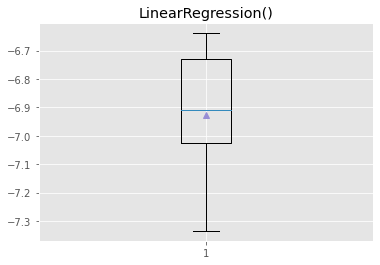

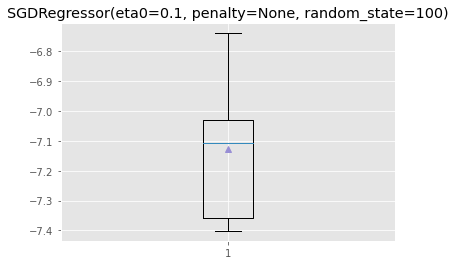

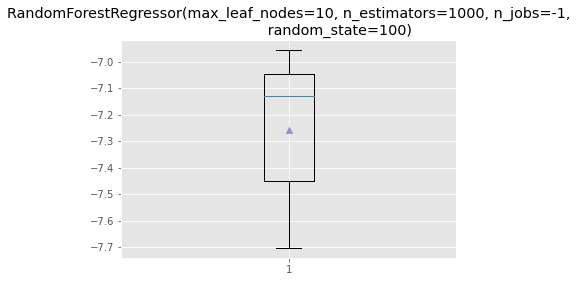

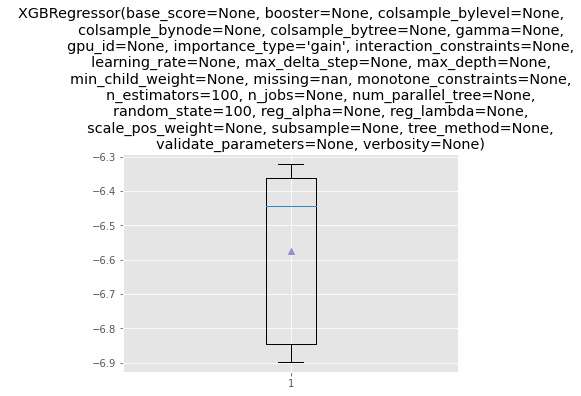

In [135]:
list_scores = []
for clf in myclf:
    scores = cross_val_score(clf, delivery_X_train_class, delivery_train_y,scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    list_scores.append(scores)    
    pyplot.boxplot(scores, showmeans=True)
    pyplot.title(clf)
    pyplot.show()    

In [136]:
#Sanity check to view the list of rmse scores
list_scores

[array([-6.63923774, -6.90963327, -7.02424098, -7.33491715, -6.73001917]),
 array([-6.73984075, -7.10620135, -7.35852   , -7.40177138, -7.02989151]),
 array([-6.9574548 , -7.12920467, -7.44946818, -7.70259569, -7.04612825]),
 array([-6.36253711, -6.44396946, -6.84674524, -6.89806661, -6.32231127])]

#### Inference
The best model (XGBoost) that predicted the actual delivery duration was off by 8 days (i.e rmse = 8 days). 
- We were hoping to obtain rmse of 4 days. Regardless:  

- This means that the best estimated delivery we can advise Olist management is:
- find important features produced by the model
    - input its values and add 6 or 7 days to its whatever the result is 

## <span style='color:red'> Task 3 - Payment Method </span>

**MODELS:**
1. KNN
2. Naive Bayes
3. Random Forest


### KNN Classification Model

#### Model Selection KNN with reduced features using Cross Validation</span>
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation  
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
import random
import math

# generate some values of K
random_k = random.sample(range(50,200), 7)
purpose_k = list(range(1,28,7))
k_list = purpose_k + random_k + [round(math.sqrt(len(payment_X_train)))] # sqrt(N) is considered the best value of K
k_list.sort()
print('List of n_neighbors to test: %s' %(k_list))

# calculate f-measures
f_score_u = []
f_score_d = []
for k in k_list:
    percent_complete = k_list.index(k)/len(k_list)*100
    print(format(percent_complete, "^03.1f"),'% complete and is now testing k =', k)
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean', n_jobs=-1)
    scores = cross_val_score(knn, payment_X_train_feats, payment_y_train_num, cv = cv, scoring='f1_weighted')
    f_score_u.append(scores.mean())
    
    knn1 = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean', n_jobs=-1)
    scores1 = cross_val_score(knn1, payment_X_train_feats, payment_y_train_num, cv = cv, scoring='f1_weighted')
    f_score_d.append(scores1.mean())
     


List of n_neighbors to test: [1, 8, 15, 22, 78, 80, 111, 126, 140, 158, 186, 269]
0.0 % complete and is now testing k = 1
8.3 % complete and is now testing k = 8
16.7 % complete and is now testing k = 15
25.0 % complete and is now testing k = 22
33.3 % complete and is now testing k = 78
41.7 % complete and is now testing k = 80
50.0 % complete and is now testing k = 111
58.3 % complete and is now testing k = 126
66.7 % complete and is now testing k = 140
75.0 % complete and is now testing k = 158
83.3 % complete and is now testing k = 186
91.7 % complete and is now testing k = 269


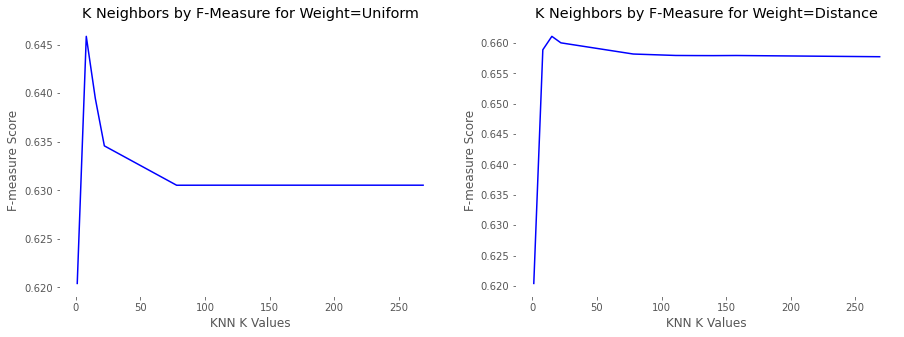


Results with Weight = Uniform
    K value  F-Measure
0         1       0.62
1         8       0.65
2        15       0.64
3        22       0.63
4        78       0.63
5        80       0.63
6       111       0.63
7       126       0.63
8       140       0.63
9       158       0.63
10      186       0.63
11      269       0.63

The best f1_measure with weight=uniform is: 0.645861 with 8 neighbors


Results with Weight = Distance
    K value  F-Measure
0         1       0.62
1         8       0.66
2        15       0.66
3        22       0.66
4        78       0.66
5        80       0.66
6       111       0.66
7       126       0.66
8       140       0.66
9       158       0.66
10      186       0.66
11      269       0.66

The best f1_measure with weight=distance is: 0.661097 with 15 neighbors

The better weight appears to be 'distance' with an f1_score of 0.661097 vs the 'uniform' f1_score of 0.645861


In [138]:
# plot the results
f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(k_list, f_score_u, color='blue')
ax[0].set_facecolor('white')
ax[0].set_title('K Neighbors by F-Measure for Weight=Uniform')
ax[0].set_xlabel('KNN K Values')
ax[0].set_ylabel('F-measure Score')

ax[1].plot(k_list, f_score_d, color='blue')
ax[1].set_facecolor('white')
ax[1].set_title('K Neighbors by F-Measure for Weight=Distance')
ax[1].set_xlabel('KNN K Values')
ax[1].set_ylabel('F-measure Score')
plt.show()

print('========================================\n')
m_f1_u = max(f_score_u)
test_results_u = pd.DataFrame({"K value": k_list, "F-Measure": f_score_u})

m_f1_d = max(f_score_d)
test_results_d = pd.DataFrame({"K value": k_list, "F-Measure": f_score_d})

print('Results with Weight = Uniform')
print(test_results_u[['K value','F-Measure']])
print('========================================\n')
print('The best f1_measure with weight=uniform is: %f with %s neighbors' % (m_f1_u ,k_list[f_score_u.index(m_f1_u)]))
print('\n========================================\n')
print('Results with Weight = Distance')
print(test_results_d[['K value','F-Measure']])
print('========================================\n')
print('The best f1_measure with weight=distance is: %f with %s neighbors' % (m_f1_d ,k_list[f_score_d.index(m_f1_d)]))
print('========================================\n')
if m_f1_u>m_f1_d:
    print('The better weight appears to be \'uniform\' with an f1_score of %f vs the \'distance\' f1_score of %f' % (m_f1_u,m_f1_d))
else:
    print('The better weight appears to be \'distance\' with an f1_score of %f vs the \'uniform\' f1_score of %f' % (m_f1_d,m_f1_u))



In [139]:
# predictions
from sklearn.model_selection import cross_val_predict

#using the n_neighbors and weights we deteremined work best above
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='euclidean', n_jobs=-1)

# make predictions
payment_yhat1 = cross_val_predict(knn, payment_X_test_feats, payment_y_test_num, cv=10)
score = f1_score(payment_y_test_num, payment_yhat1, average=None)


F_measure: [0.0625286  0.84732752 0.         0.38247338]


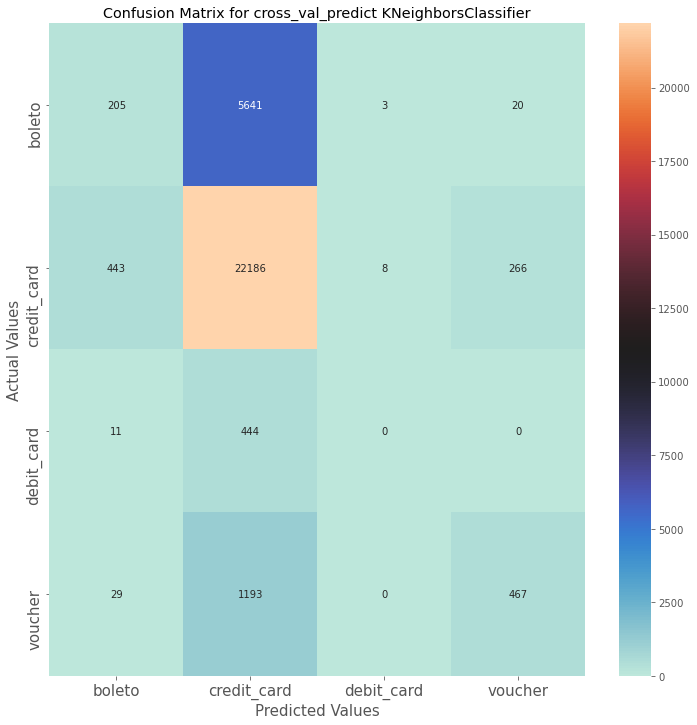

In [140]:
#create confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://seaborn.pydata.org/tutorial/color_palettes.html

### sites about formatting strings in python ###
# https://pyformat.info/
# https://fmt.dev/latest/syntax.html#grammar-token-int_type

from sklearn import metrics as mt

labels = ['boleto','credit_card','debit_card','voucher']
payment_conf_knn1 = mt.confusion_matrix(le.inverse_transform(payment_y_test_num), le.inverse_transform(payment_yhat1), labels=labels)
print('F_measure: %s' %(score))
# plot results in a heatmap
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(payment_conf_knn1, annot=True, fmt='g', ax=ax, cmap='icefire') 
# annot = put data in cell; fmt = how to format the in-chart labels; cmap = color

ax.set_xlabel('Predicted Values', size=15)
ax.set_ylabel('Actual Values', size=15)
ax.set_title('Confusion Matrix for cross_val_predict KNeighborsClassifier')
ax.xaxis.set_ticklabels(labels, size=15)
ax.yaxis.set_ticklabels(labels, size=15)
plt.show()


####  **KNearestClassifier score_val_predict Chart Interpretation:** 
This heatmap shows us the true positive and false positive results from running the 10-fold cross validation using KNN on our reduced features dataset. The diagonal numbers from the top-left to the bottom-right represent the true positive results using the predict function from cross_val_predict and a test set that was never shown to the model because it was held out prior to any pre-processing, but the pre-processing was replicated to ensure the test set was shaped the same as the training set.

Intuitively credit cards are the most widely used payment source, so it makes sense that they have the highest true positive matches (20,883 TP/ 23,051 actual)and debit cards are the least used with similar results (1 TP/ 458 actual). It also makes sense the model keeps trying to classify everything as a credit card since credit cards make up 74% of the payment method for the test set while debite cards are only 1.5% of the test set payment types.  

Now we will actually fit the model using the parameters established above and revisit our heatmap for a final analysis


In [141]:
# fit the model and predict
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='euclidean', n_jobs=-1)
knn.fit(payment_X_train_feats, payment_y_train_num)
payment_yhat2 = knn.predict(payment_X_test_feats)
payment_f1_knn = f1_score(payment_y_test_num, payment_yhat2, average=None)
#print(payment_f1_knn)

labels = ['boleto','credit_card','debit_card','voucher']
payment_conf_knn2 = mt.confusion_matrix(le.inverse_transform(payment_y_test_num), le.inverse_transform(payment_yhat2), labels=labels)


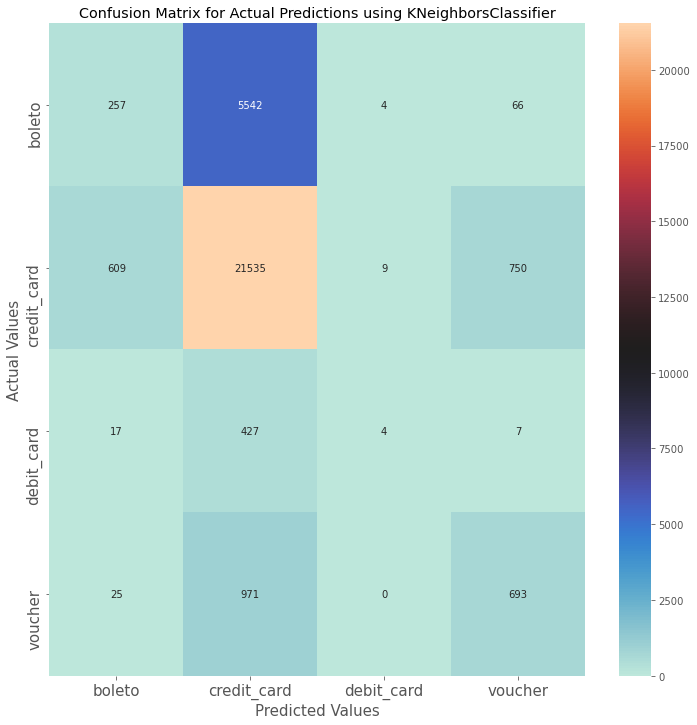

  payment_type  f1_measure
0       boleto        0.08
1  credit_card        0.84
2   debit_card        0.02
3      voucher        0.43


In [142]:
# plot results in a heatmap
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(payment_conf_knn2, annot=True, fmt='g', ax=ax, cmap='icefire')

ax.set_xlabel('Predicted Values', size=15)
ax.set_ylabel('Actual Values', size=15)
ax.set_title('Confusion Matrix for Actual Predictions using KNeighborsClassifier')
ax.xaxis.set_ticklabels(labels, size=15)
ax.yaxis.set_ticklabels(labels, size=15)
plt.show()


fmeasure_knn = pd.DataFrame({'payment_type':labels,
                         'f1_measure': payment_f1_knn})
print(fmeasure_knn)

#### **KNearestClassifier Predicted Chart Interpretation:**
This heatmap shows us the true positive and false positive results from running the predictions using KNN on our reduced features dataset. The diagonal numbers from the top-left to the bottom-right represent the true positive results using the predict function from cross_val_predict and a test set that was never shown to the model because it was held out prior to any pre-processing, but the pre-processing was replicated to ensure the test set was shaped the same as the training set.

Intuitively credit cards are the most widely used payment source, so it makes sense that they have the highest true positive matches (19,514 TP/ 23,051 actual) - note this is down from the CV above, and debit cards are the least used with similar results (11 TP/ 458 actual) and this improved from the cross_val_predict above. It also makes sense the model keeps trying to classify everything as a credit card since credit cards make up 74% of the payment method for the test set while debite cards are only 1.5% of the test set payment types.  

Further we can use our f_measures that shows the relationship between the precision and the recall for each predicted class. Here we see that the KNN model really struggles identifying minority classes, while having a really nice 80% balance for the majority class - credit cards.

### Naive Bayes Classification Model

https://scikit-learn.org/stable/modules/classes.html?highlight=bayes#module-sklearn.naive_bayes

In [143]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# got ValueError: Negative values in data passed to CategoricalNB (input X)
# from online research, it was suggest to try to use MinMaxScaler() to preprocess train/test data so its between 0.1
# https://stackoverflow.com/questions/67224279/how-can-i-resolve-this-error-valueerror-negative-values-in-data-passed-to-m

scl = MinMaxScaler()
payment_train_nb = scl.fit_transform(payment_X_train_feats)
payment_test_nb = scl.fit_transform(payment_X_test_feats)



# naive bayes using cv
payment_nb = CategoricalNB(alpha = 1.0, fit_prior=True)

# fit model
payment_nb.fit(payment_train_nb, payment_y_train_num)
payment_yhat_nb = payment_nb.predict(payment_test_nb)

payment_f1_nb = f1_score(payment_y_test_num, payment_yhat_nb, average=None)


labels = ['boleto','credit_card','debit_card','voucher']
payment_conf_nb = mt.confusion_matrix(le.inverse_transform(payment_y_test_num), le.inverse_transform(payment_yhat_nb), labels=labels)


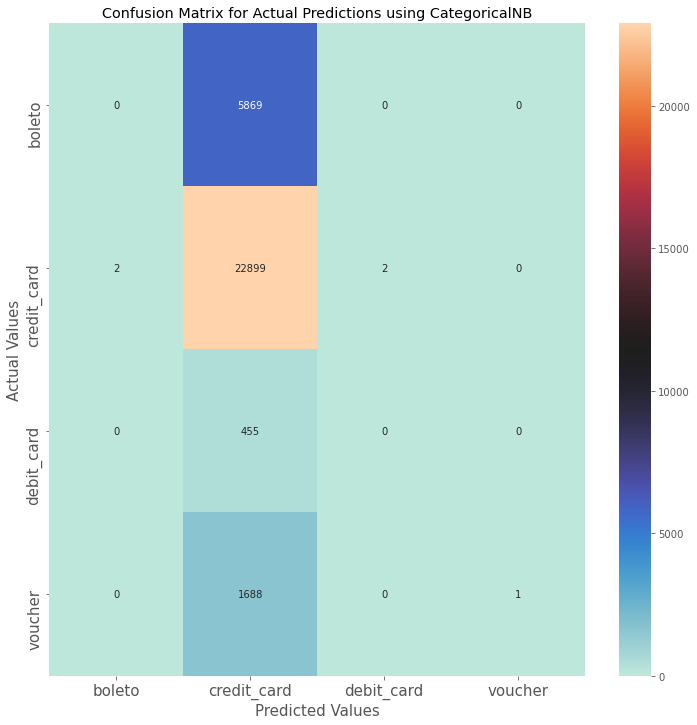

  payment_type  f1_measure
0       boleto        0.00
1  credit_card        0.85
2   debit_card        0.00
3      voucher        0.00


In [148]:
# plot results in a heatmap
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(payment_conf_nb, annot=True, fmt='g', ax=ax, cmap='icefire')

ax.set_xlabel('Predicted Values', size=15)
ax.set_ylabel('Actual Values', size=15)
ax.set_title('Confusion Matrix for Actual Predictions using CategoricalNB')
ax.xaxis.set_ticklabels(labels, size=15)
ax.yaxis.set_ticklabels(labels, size=15)
plt.show()

fmeasure_nb = pd.DataFrame({'payment_type':labels,
                         'f1_measure': payment_f1_nb})
print(fmeasure_nb)

#### **CategoricalNB Predicted Chart Interpretation:** 
NB in general does not have much in terms of paramter tuning, so it triggers errors when you try to run it with cross_val_score.
From my understanding of NB, the algorith assumes there is independence among the features and while we did our best to root out the highly correlated attributes, there is still some dependence among them. This particular model is fairly useless for our cases here.

### Random Forest Classification Model
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#

In [145]:
from sklearn.ensemble import RandomForestClassifier

# keep in mind our data was preprocessed and scaled for previous tests!

rfc = RandomForestClassifier(random_state=42)

rfc.fit(payment_X_train_feats, payment_y_train_num)
payment_yhat_rfc = cross_val_predict(rfc,payment_X_test_feats,payment_y_test_num, cv=10)

payment_f1_rfc = f1_score(payment_y_test_num, payment_yhat_rfc, average=None)


labels = ['boleto','credit_card','debit_card','voucher']
payment_conf_rfc = mt.confusion_matrix(le.inverse_transform(payment_y_test_num), le.inverse_transform(payment_yhat_rfc), labels=labels)

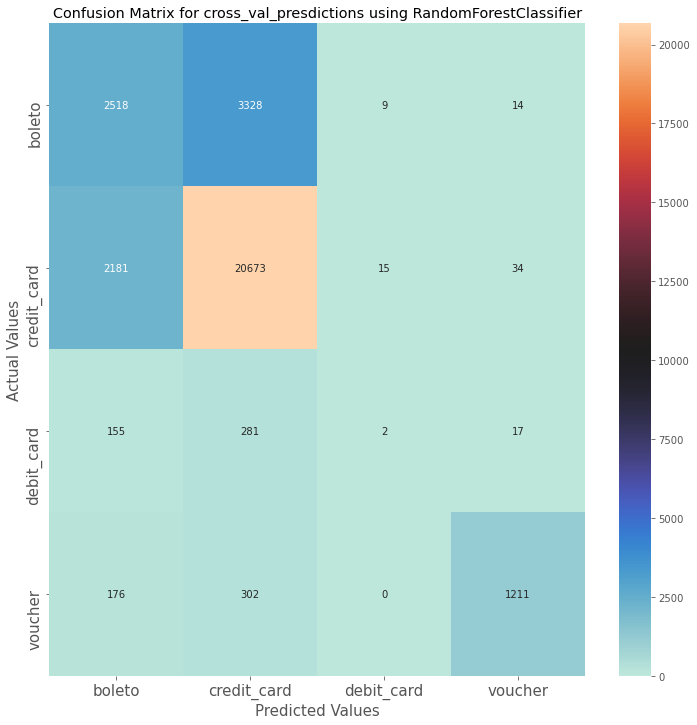

  payment_type  f1_measure
0       boleto        0.46
1  credit_card        0.87
2   debit_card        0.01
3      voucher        0.82


In [146]:
# plot results in a heatmap
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(payment_conf_rfc, annot=True, fmt='g', ax=ax, cmap='icefire')

ax.set_xlabel('Predicted Values', size=15)
ax.set_ylabel('Actual Values', size=15)
ax.set_title('Confusion Matrix for cross_val_presdictions using RandomForestClassifier')
ax.xaxis.set_ticklabels(labels, size=15)
ax.yaxis.set_ticklabels(labels, size=15)
plt.show()

fmeasure_rfc = pd.DataFrame({'payment_type':labels,
                         'f1_measure': payment_f1_rfc})
print(fmeasure_rfc)

# <span style='color:blue'>Modeling and Evaluation 4</span>
<span style='color:blue'>* [10 points] Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.</span>

## <span style='color:red'> Task 1 - Review Scores </span> 

## <span style='color:red'> Task 2 - Delivery Date </span>

## <span style='color:red'> Task 3 - Payment Method </span>



### KNN Analysis and Visualization of Results

### Naive Bayes Analysis and Visualization of Results

### Random Forest Analysis and Visualization of Results

# <span style='color:blue'>Modeling and Evaluation 5</span>
<span style='color:blue'>* [10 points] Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.</span>

## <span style='color:red'> Task 1 - Review Scores </span> 

## <span style='color:red'> Task 2 - Delivery Date </span>

## <span style='color:red'> Task 3 - Payment Method </span>



 - Overall KNN felt that is performed the best using f-measures, again we used f-measures because we had an unbalanced class distribution in our response variable set.  
    - Random Forest did the best job of finding a better balance between precision and recall across the all 4 response classes.  Each model stuggled with the minority classes (not credit cards), but Random Forest was able to find an 80% balance between precision and recall in correctly identifying voucers.
    - Random Forest also has considerable more tuning parameters and while we were only able to tune a handful of them using GridSeachCV, I suspect with more time and better efficiency through practice we can really get this model performing well.
    - On the other hand KNN was able to find a 36% balance between precision and recall for vouchers while also getting a high balance on credit cards at 80%.
    - Both KNN and Random Forest performed similarly finding balance in correctly identifying boleto (17% and 18% respectively).
    - Naive Bayes was the worst performing model and my assumption is because the model independence between the feautes, so while it found a nice 85% f-measure for credit cards, it scored a 0 for all 3 minority classes, again keeping in mind the f-measure penalizes dramatically if either the precision or recall is 0, the whole f-measure = 0. 
- Is the difference significant with 95% confidence? 
    - Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
    - See Below for Statistical Comparison:

In [149]:
print(' === KNN: === \n',fmeasure_knn,'\n')
print(' === Naive Bayes: === \n',fmeasure_nb,'\n')
print(' === Random Forest: === \n',fmeasure_rfc,'\n')

 === KNN: === 
   payment_type  f1_measure
0       boleto        0.08
1  credit_card        0.84
2   debit_card        0.02
3      voucher        0.43 

 === Naive Bayes: === 
   payment_type  f1_measure
0       boleto        0.00
1  credit_card        0.85
2   debit_card        0.00
3      voucher        0.00 

 === Random Forest: === 
   payment_type  f1_measure
0       boleto        0.46
1  credit_card        0.87
2   debit_card        0.01
3      voucher        0.82 



In [151]:
#using the n_neighbors and weights parameters we deteremined work best above
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='euclidean', n_jobs=-1)

# naive bayes using cv
nb = CategoricalNB(alpha = 1.0, fit_prior=True)

# Random Forest using tuning parameters and cv
rfc = RandomForestClassifier(n_estimators = 150, criterion = 'entropy',
                             min_samples_split = 2, min_samples_leaf = 1,
                             max_features = 5, random_state=42, n_jobs=-1)

# splits
cv = StratifiedShuffleSplit(n_splits=10,test_size = 0.3, train_size = 0.7, random_state=42) #note default is 10 splits!


# put models into a list
acc = []
yhat = []
names = []
models = []
models.append(('KNN', knn))
#models.append(('NB', nb))
models.append(('RF', rfc))

for name, model in models:
    cv = StratifiedShuffleSplit(n_splits=10,test_size = 0.3, train_size = 0.7, random_state=42)
    #switching to acc since I am not familiar with other ways of comparing scores
    cv_results = cross_val_score(model, payment_X_train_feats, payment_y_train_num, cv=cv, scoring='accuracy') 
    cv_fit = model.fit(payment_X_train_feats, payment_y_train_num)
    cv_predict = model.predict(payment_X_test_feats)
    acc.append(cv_results)
    yhat.append(cv_predict)
    names.append(name)

f1_nb = f1_score(payment_y_test_num, payment_yhat_nb, average=None)


In [153]:
# note nb keeps kicking out errors with cross_val_score, so we will just use a simple accuracy score from nb
nb.fit(payment_train_nb, payment_y_train_num)
yhat_nb = nb.predict(payment_test_nb)
acc2 = accuracy_score(payment_y_test_num, yhat_nb)

acc2

0.7407167809548454

In [155]:
import scipy.stats
import math

errors = (1-acc[0])-(1-acc[1])
stdtot = np.std(errors)
dbar = np.mean(errors)
var = 1/4*(sum(errors-dbar))

# t crit value
t = scipy.stats.t.ppf(q=1-0.05/2,df=4)
CI_low = dbar - ((1/np.sqrt(5)) * t * stdtot)
CI_high = dbar + ((1/np.sqrt(5)) * t * stdtot)
print('\n===== Statistical Model Assessment =====\n')
print('===== KNN vs Random Forest (using arrays) =====\n')
print('With 95%','confidence, we fail to reject the null hypothesis that the KNN and Random Forest classifiers\n are statistically the same, CI(%f, %f)' % (CI_low, CI_high))

# == Conf Intervals
# mean errors
knn_err_mean = 1-np.mean(acc[0])
rfc_err_mean = 1-np.mean(acc[1])
nb_err_mean = 1-acc2
 
# variances
knn_var = knn_err_mean*np.mean(acc[0]) / payment_X_train_num.shape[0]
rfc_var = rfc_err_mean*np.mean(acc[1]) / payment_X_train_num.shape[0]
nb_var = nb_err_mean*acc2 / payment_X_train_num.shape[0]

print('Note: In this section since we were not able to get the CategoricalNB to work with a cross validation score, we used the\nmean scores from the other models to compare to a single score of the NB model\n')

# == KNN vs RF
print('\n===== KNN vs Random Forest Classifier (using means) =====\n')
CI_low_knn_rf = (knn_err_mean-rfc_err_mean) - (t * np.sqrt(knn_var+rfc_var))
CI_high_knn_rf = (knn_err_mean-rfc_err_mean) + (t * np.sqrt(knn_var+rfc_var))
print('KNN vs RF CI (%f, %f)' % (CI_low_knn_rf, CI_high_knn_rf))
print('With 95%','confidence, we fail to reject the null hypothesis that the KNN and Random Forest classifiers\nare statistically the same, CI(%f, %f)' % (CI_low_knn_rf, CI_high_knn_rf))

# == KNN vs NB
print('\n===== KNN vs Naive Bayes Classifier =====\n')
CI_low_knn_nb = (knn_err_mean-nb_err_mean) - (t * np.sqrt(knn_var + nb_var))
CI_high_knn_nb = (knn_err_mean-nb_err_mean) + (t * np.sqrt(knn_var + nb_var))
print('KNN vs NB CI (%f, %f)' % (CI_low_knn_nb, CI_high_knn_nb))
print('With 95%','confidence, we fail to reject the null hypothesis that the KNN and Naive Bayes classifiers\nare statistically the same, CI(%f, %f)' % (CI_low_knn_nb, CI_high_knn_nb))

# == NB vs RF
print('\n===== Naive Bayes vs Random Forest Classifier ====\n')
CI_low_nb_rf = (nb_err_mean - rfc_err_mean) - (t * np.sqrt(rfc_var + nb_var))
CI_high_nb_rf = (nb_err_mean - rfc_err_mean) + (t * np.sqrt(rfc_var + nb_var))
print('NB vs RF CI (%f, %f)' % (CI_low_nb_rf, CI_high_nb_rf))
print('With 95%','confidence, we fail to reject the null hypothesis that the Naive Bayes and Random Forest classifiers\nare statistically the same, CI(%f, %f)' % (CI_low_nb_rf, CI_high_nb_rf))



===== Statistical Model Assessment =====

===== KNN vs Random Forest (using arrays) =====

With 95% confidence, we fail to reject the null hypothesis that the KNN and Random Forest classifiers
 are statistically the same, CI(0.056561, 0.060351)
Note: In this section since we were not able to get the CategoricalNB to work with a cross validation score, we used the
mean scores from the other models to compare to a single score of the NB model


===== KNN vs Random Forest Classifier (using means) =====

KNN vs RF CI (0.052262, 0.064649)
With 95% confidence, we fail to reject the null hypothesis that the KNN and Random Forest classifiers
are statistically the same, CI(0.052262, 0.064649)

===== KNN vs Naive Bayes Classifier =====

KNN vs NB CI (-0.000442, 0.012418)
With 95% confidence, we fail to reject the null hypothesis that the KNN and Naive Bayes classifiers
are statistically the same, CI(-0.000442, 0.012418)

===== Naive Bayes vs Random Forest Classifier ====

NB vs RF CI (0.046299,

# <span style='color:blue'>Modeling and Evaluation 6</span>
<span style='color:blue'>* [10 points] Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.</span>

### Feature Importance
- In addition to prediction, understanding the aspects of the order transaction that control delivery will inform improvement steps.
- Such features can be obtained from the model that predicted the target variable.
    - Unfortunately, the series of column transformation applied to the data made it difficult to display the original attribute names.
    - However, in a similar version, we can use treet based algorithms to score these attributes in their raw state.
    - This is a reliable method, given that scaling and standardization are not essential for tree-based algorithms.
    

## <span style='color:red'> Task 1 - Review Scores </span> 

**Error in prediction**
- *could not convert string to float: 'furniture_decor'*.  
- Therefore I converted some of the feature levels to numericals.

In [156]:
#Processing for feature selection
review_fs = copy.deepcopy(olist_model5)
review_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103054 entries, 0 to 114066
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   customer_zip_code_prefix       103054 non-null  category
 1   payment_sequential             103054 non-null  float64 
 2   payment_type                   103054 non-null  category
 3   payment_installments           103054 non-null  float64 
 4   freight_value                  103054 non-null  float64 
 5   product_weight_g               103053 non-null  float64 
 6   product_category_english       103054 non-null  category
 7   seller_zip_code_prefix         103054 non-null  category
 8   tot_order_amt                  103054 non-null  float64 
 9   purchase_wk_day                103054 non-null  category
 10  purchase_month                 103054 non-null  category
 11  product_dimensions             103053 non-null  float64 
 12  review_score_cla

Given errors in string format categories, I changed the level to numeric values

In [172]:
for_code = ['product_category_english', 'purchase_wk_day', 'purchase_month', 'payment_type']

In [173]:
review_fs.columns

Index(['customer_zip_code_prefix', 'payment_sequential', 'payment_type',
       'payment_installments', 'freight_value', 'product_weight_g',
       'product_category_english', 'seller_zip_code_prefix', 'tot_order_amt',
       'purchase_wk_day', 'purchase_month', 'product_dimensions',
       'review_score_class_num', 'order_deliver_actual_duration'],
      dtype='object')

In [174]:
for i in review_fs.columns:
    if i in for_code:
        review_fs[i] = review_fs[i].copy().astype("category").cat.codes
        

In [175]:
review_fs.head()

,customer_zip_code_prefix,payment_sequential,payment_type,payment_installments,freight_value,product_weight_g,product_category_english,seller_zip_code_prefix,tot_order_amt,purchase_wk_day,purchase_month,product_dimensions,review_score_class_num,order_deliver_actual_duration
0,39801,1.00,1,8.00,19.53,800.00,16,13321.00,99.33,6,0,7803.00,0,13.00
1,2422,1.00,1,1.00,7.39,150.00,0,4660.00,24.39,5,6,1056.00,2,3.00
2,2652,1.00,1,1.00,8.72,250.00,22,9015.00,65.71,5,2,3360.00,2,4.00
3,36060,1.00,1,8.00,17.88,1200.00,2,13405.00,107.78,6,2,3080.00,2,14.00
5,18570,1.00,1,2.00,14.88,835.00,2,14940.00,128.45,1,8,11880.00,2,11.00


In [176]:
review_fs.isnull().values.any()

False

In [177]:
#2 NaNs came up. Too few to deal with so I removed them.
review_fs.isnull().sum().sum()

0

In [178]:
review_fs.dropna(inplace=True)

In [179]:
#Simple train test split

from sklearn.model_selection import train_test_split
review_fs_train, review_fs_test = train_test_split(review_fs, test_size=0.2,random_state=100, stratify=review_fs.review_score_class_num)

In [180]:
review_fs_train_y = review_fs_train.review_score_class_num

In [181]:
review_fs_test_y = review_fs_test.review_score_class_num

In [182]:
review_fs_test_noY = review_fs_test.copy().drop(columns=['review_score_class_num'])
review_fs_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20611 entries, 9714 to 44373
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       20611 non-null  category
 1   payment_sequential             20611 non-null  float64 
 2   payment_type                   20611 non-null  int8    
 3   payment_installments           20611 non-null  float64 
 4   freight_value                  20611 non-null  float64 
 5   product_weight_g               20611 non-null  float64 
 6   product_category_english       20611 non-null  int8    
 7   seller_zip_code_prefix         20611 non-null  category
 8   tot_order_amt                  20611 non-null  float64 
 9   purchase_wk_day                20611 non-null  int8    
 10  purchase_month                 20611 non-null  int8    
 11  product_dimensions             20611 non-null  float64 
 12  order_deliver_actual_duration

In [183]:
review_fs_train_noY = review_fs_train.copy().drop(columns=['review_score_class_num'])
review_fs_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82442 entries, 78754 to 5472
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_zip_code_prefix       82442 non-null  category
 1   payment_sequential             82442 non-null  float64 
 2   payment_type                   82442 non-null  int8    
 3   payment_installments           82442 non-null  float64 
 4   freight_value                  82442 non-null  float64 
 5   product_weight_g               82442 non-null  float64 
 6   product_category_english       82442 non-null  int8    
 7   seller_zip_code_prefix         82442 non-null  category
 8   tot_order_amt                  82442 non-null  float64 
 9   purchase_wk_day                82442 non-null  int8    
 10  purchase_month                 82442 non-null  int8    
 11  product_dimensions             82442 non-null  float64 
 12  order_deliver_actual_duration

In [184]:
#importance

*NOTE*:  
Feature importance code block was adapted from:  
- Feature importances with a forest of trees, Sci-Kit Learn.  
    - https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [185]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(review_fs_train_noY, review_fs_train_y)
importance = model.feature_importances_
for i,v in zip(review_fs_train_noY.columns, importance):
    print('Feature: %s, Score: %.5f' % (i,v))
    

Feature: customer_zip_code_prefix, Score: 0.15076
Feature: payment_sequential, Score: 0.00525
Feature: payment_type, Score: 0.01918
Feature: payment_installments, Score: 0.04128
Feature: freight_value, Score: 0.10703
Feature: product_weight_g, Score: 0.08235
Feature: product_category_english, Score: 0.04927
Feature: seller_zip_code_prefix, Score: 0.08206
Feature: tot_order_amt, Score: 0.11528
Feature: purchase_wk_day, Score: 0.05547
Feature: purchase_month, Score: 0.06559
Feature: product_dimensions, Score: 0.08742
Feature: order_deliver_actual_duration, Score: 0.13906


In [186]:
#Reminder of class proportions
olist_model4['review_score_class_num'].value_counts()/len(olist_model5)

2   0.85
0   0.17
1   0.09
Name: review_score_class_num, dtype: float64

#### Importance of Features

*Note: *Review Score representation: 0 = Bad (17%), 1 = fair (9%), 2 = Good (84%)
**Caveat**

The feature importance as shown here is not the feature importance responsible for EACH class, rather it is the important features that influenced the classifier's decision to discern among the classes.


- Feature with the highest score is order_deliver_actual_duration
- followed by customer_zip_code_prefix
- followed by tot_order_amt(total order amount and freight_value)

- I believe the reason why the algorithm rightly picked order_deliver_actual_duration as the highest score is because, earlier, we saw a strong association that indicates that customers that received their order early provided good reviews.
- As for customer_zip_code_prefix: This may not have a direct association with customer review score.
- Rather, the fact that most customers come from a certain location means that their will be a greater number of customers providing review scores in general. 

## <span style='color:red'> Task 2 - Delivery Date </span>

## <span style='color:red'> Task 3 - Payment Method </span>



# <span style='color:blue'>Deployment</span>
<span style='color:blue'>* [5 Points] How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?</span>

# <span style='color:blue'>Exceptional Work</span>
<span style='color:blue'> * [10 Points] You have free reign to provide additional analyses. <br>
<span style='color:blue'> * One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm? 

* Boleto Bancário, commonly known as Boleto, is a popular Brazilian cash-based payment method with 15% market share. It is also the only payment method available for the 35% of shoppers who do not have a bank account.

**Parameters Search** 

- Below algorithm used RandomizedSearch cross validation technique to tune the hyperparameters of Stochastic Gradient Classifier.
- We then obtained the performance metric for the best model determined by the search method.

In [ ]:
%%time
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import RandomizedSearchCV 

# create variable dictionaries
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge']
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
eta0 = [0.1, 1, 10, 100] 

# create hyperparameter options
param_distributions = dict(loss=loss, 
                           penalty=penalty, 
                           alpha=alpha, 
                           learning_rate=learning_rate, 
                           eta0=eta0)

# create the classifier
sgd = SGDClassifier(early_stopping=True, validation_fraction=0.15, max_iter=100, class_weight = "balanced") 

# create RandomizedSearchCV
random = RandomizedSearchCV(estimator=sgd,
                            param_distributions=param_distributions, 
                            verbose=1, 
                            n_iter=100, 
                            n_jobs=-1) 
random_result = random.fit(X_train_rs1, olist_strat_train_y) 

In [ ]:
%%time
# Print Best Results
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_)
print('Best Time (seconds): ', random_result.refit_time_)

In [ ]:
%%time
# predict using best model
yhat_rand_svm = random_result.predict(X_test_rs)

print('Best Random SVM SD Metrics:')
print(classification_report(olist_strat_test_y, yhat_rand_svm, zero_division=0))

#### Best selected model

*Note: Review Score representation: 0 = Bad (17%), 1 = fair (9%), 2 = Good (84%)*  

**Parameter search**
- The randomized grid search algorithm selected Support Vector Machine in Stochastic Gradient Descent mode as the best technique. 
- But the Model failed to correctly predict any instance for fair score class (precision and recall), thereby performing worse than the RandomForest and Ensemble techniques above.

In [ ]:

sgd_best = SGDClassifier(early_stopping=True, penalty='l2', loss='hinge', learning_rate='optimal', eta0= 0.1, alpha=0.01, class_weight = "balanced") 

In [ ]:
sgd_best_fit = sgd_best.fit(X_train_rs1, olist_strat_train_y)


In [ ]:
%%time
# predict using best model
yhat_rand_svm_best = sgd_best_fit.predict(X_test_rs)

print('Best Random SVM SD Metrics:')
print(classification_report(olist_strat_test_y, yhat_rand_svm_best, zero_division=0))